In [40]:
# import glob
# [_.split('/')[-1] for _ in glob.glob('../*.txt')]

In [41]:
import pandas as pd
import pickle
import sys
import os
dir_path = '/'.join(os.path.realpath('.').split('/')[:-1])
sys.path.append(f'{dir_path}/sabatinilab-glm/backend')
sys.path.append(f'{dir_path}/..')
sys.path.append(f'{dir_path}/backend')
sys.path.append(f'{dir_path}/../backend')

import sglm
import sglm_cv
import sglm_pp
import sglm_ez
import sglm_plt as splt
import sglm_save as ssave
import lynne_pp as lpp
from tqdm import tqdm, trange

# gdat = pickle.load(open('../../model_outputs/ssave/77_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_unrewarded_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_unrewarded_cvsize=.05_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_unrewarded_cvsize=.01_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/w_unrewarded_cvsize=.01_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_cv_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_cv2_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_cv2_maxiter10k_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/no_cv_shuffle_kwargs_Ach_rDAh_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/new_lynne_GLM_SIGNALS_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/new_lynne2_GLM_SIGNALS_WT63_11082021.pkl', 'rb'))
# gdat = pickle.load(open('../../model_outputs/ssave/new_lynne_purel1l2_GLM_SIGNALS_WT63_11082021.pkl', 'rb'))

gdat = pickle.load(open('../../model_outputs/ssave/new_lynne_w_dummy_GLM_SIGNALS_WT63_11082021.pkl', 'rb'))



In [42]:
gdat.data.keys()

dict_keys(['fit_results', 'uid', 'filename', 'negorder', 'posorder', 'X_cols', 'gss_info', 'basedata'])

In [43]:
bd = gdat.data['basedata']
# bd['wi_trial_keep']
# bd

In [44]:
# bd[bd['wi_trial_keep']]

In [45]:
# gdat.data.keys()

In [46]:
gdat.data['X_cols']

['nTrial', 'cpn', 'cpx', 'spnr', 'spxr', 'spnnr', 'spxnr', 'sl']

In [47]:
col_names = ['fn', 'response', 'dropped', 'alpha', 'l1_ratio', 'tr_witi', 'tr_noiti', 'gss_witi', 'gss_noiti', 'holdout_witi', 'holdout_noiti']
df = pd.DataFrame(columns=col_names)

for fr in gdat.data['fit_results']:
    print(fr.keys())
    dc = fr['dropped_cols']
    rc = fr['response_col']
    hp = fr['hyperparams']
    scores = fr['scores']
    # print(fr.keys())
    print('response_col:', rc, '— dropped_cols', dc, '— hyperparams', hp)
    for sc in scores:
        if scores[sc] is not None:
            print('>', sc, scores[sc])
    
    df = df.append(pd.DataFrame([[gdat.data['filename'], rc, dc, hp['alpha'], hp['l1_ratio'], scores['tr_witi'], scores['tr_noiti'], scores['gss_witi'], scores['gss_noiti'], scores['holdout_witi'], scores['holdout_noiti']]], columns=col_names))

dict_keys(['response_col', 'hyperparams', 'glm_model_gss', 'dropped_cols', 'scores', 'gss_mse', 'refit_mse', 'gssids'])
response_col: resp1 — dropped_cols [] — hyperparams {'max_iter': 1000, 'fit_intercept': True, 'alpha': 0, 'l1_ratio': 0.0}
> tr_witi 0.2067228215959117
> tr_noiti 0.32292384627459525
> gss_witi 0.19343835792958075
> holdout_witi 0.22377165990873793
> holdout_noiti 0.3328598117587138
dict_keys(['response_col', 'hyperparams', 'glm_model_gss', 'dropped_cols', 'scores', 'gss_mse', 'refit_mse', 'gssids'])
response_col: resp1 — dropped_cols [] — hyperparams {'max_iter': 1000, 'fit_intercept': True, 'alpha': 0, 'l1_ratio': 0.001}
> tr_witi 0.2067228215959117
> tr_noiti 0.32292384627459525
> gss_witi 0.19343835792958075
> holdout_witi 0.22377165990873793
> holdout_noiti 0.3328598117587138
dict_keys(['response_col', 'hyperparams', 'glm_model_gss', 'dropped_cols', 'scores', 'gss_mse', 'refit_mse', 'gssids'])
response_col: resp1 — dropped_cols [] — hyperparams {'max_iter': 1000,

In [48]:
# num_view = 5
# display(df.query("response == 'zsgdFF'").sort_values('holdout_noiti').iloc[-num_view:])
# display(df.query("response == 'zsgdFF'").sort_values('holdout_witi').iloc[-num_view:])
# display(df.query("response == 'zsgdFF'").sort_values('gss_witi').iloc[-num_view:])

# display(df.query("response == 'zsrdFF'").sort_values('holdout_noiti').iloc[-num_view:])
# display(df.query("response == 'zsrdFF'").sort_values('holdout_witi').iloc[-num_view:])
# display(df.query("response == 'zsrdFF'").sort_values('gss_witi').iloc[-num_view:])

In [58]:
with pd.option_context('max_rows',1000):
    display(df.sort_values('holdout_noiti', ascending=False))

fn response dropped  alpha  l1_ratio   tr_witi  \
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []      0     0.000  0.206723   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []      0     1.000  0.206723   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []      0     0.001  0.206723   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []  0.001     0.000  0.206723   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []   0.01     0.000  0.206723   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []    0.1     0.000  0.206723   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []      1     0.000  0.206714   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []     10     0.000  0.206171   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []  0.001     0.001  0.203755   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []  0.001     1.000  0.193515   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []    100     0.000  0.195373   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []   0.01     0.001  0.171054   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []      0     1.000  0.200942   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []      0     0.000  0.200942   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []      0     0.001  0.200942   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []  0.001     0.000  0.200942   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []   0.01     0.000  0.200942   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []    0.1     0.000  0.200942   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []      1     0.000  0.200924   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []     10     0.000  0.200249   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []  0.001     0.001  0.198278   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []    100     0.000  0.191271   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []      0     1.000  0.154463   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []      0     0.001  0.154463   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []      0     0.000  0.154463   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []  0.001     0.000  0.154463   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []   0.01     0.000  0.154463   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []    0.1     0.000  0.154463   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []      1     0.000  0.154455   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []     10     0.000  0.154024   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []  0.001     0.001  0.152282   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []  0.001     1.000  0.184706   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []    100     0.000  0.146570   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []  0.001     1.000  0.141909   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []   0.01     0.001  0.172401   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []   0.01     0.001  0.130589   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []    0.1     0.001  0.067267   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []    0.1     0.001  0.085737   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []    0.1     0.001  0.077769   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []   0.01     1.000  0.066840   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []   0.01     1.000  0.047234   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []   0.01     1.000  0.052095   
0  GLM_SIGNALS_WT63_11082021.txt    resp4      []      1     0.001  0.021548   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []      1     0.001  0.016826   
0  GLM_SIGNALS_WT63_11082021.txt    resp1      []      1     0.001  0.019603   
0  GLM_SIGNALS_WT63_11082021.txt    resp3      []     10     0.001  0.001009   
0  GLM_SIGNALS_WT63_11082021.txt    resp2      []   0.01     0.001  0.004832   
0  GLM_SIGNALS_WT63_11082021.txt    resp2      []  0.001     1.000  0.001337   
0  GLM_SIGNALS_WT63_11082021.txt    resp2      []    0.1     0.001  0.001257   
0  GLM_SIGNALS_WT63_11082021.t

In [50]:
# df['delta'] = df['holdout_witi'] - df['gss_witi']
df['delta'] = df['holdout_witi'].apply(lambda x: x) - df['tr_witi']
df = df[~df['dropped'].astype(str).str.contains('nTrial')]

with pd.option_context('max_rows', 10000):
    # display(df.sort_values(['response', 'alpha', 'l1_ratio', 'delta'], ascending=[True, True, True, False]))
    display(df.assign(dropped=df['dropped'].astype(str)).set_index(['response', 'alpha', 'l1_ratio', 'dropped'])['delta'].unstack(-1).sort_index())


dropped                              []
response alpha   l1_ratio              
SGP_1    0.000   0.000    -2.706407e-02
                 0.001    -2.706407e-02
                 1.000    -2.706407e-02
         0.001   0.000    -2.706382e-02
                 0.001    -2.213060e-02
                 1.000    -5.386359e-03
         0.010   0.000    -2.706157e-02
                 0.001    -1.155097e-02
                 1.000    -1.331359e-04
         0.100   0.000    -2.703815e-02
                 0.001    -3.021633e-03
                 1.000    -1.331359e-04
         1.000   0.000    -2.675018e-02
                 0.001    -3.736103e-04
                 1.000    -1.331359e-04
         10.000  0.000    -2.376411e-02
                 0.001    -1.331359e-04
                 1.000    -1.331359e-04
         100.000 0.000    -1.408164e-02
                 0.001    -1.331359e-04
                 1.000    -1.331359e-04
SGP_2    0.000   0.000    -2.069382e-02
                 0.001    -2.069382e-02
                 1.000    -2.069382e-02
         0.001   0.000    -2.069363e-02
                 0.001    -1.773597e-02
                 1.000    -3.961485e-03
         0.010   0.000    -2.069192e-02
                 0.001    -9.220270e-03
                 1.000    -1.359454e-05
         0.100   0.000    -2.067456e-02
                 0.001    -1.831824e-03
                 1.000    -1.359454e-05
         1.000   0.000    -2.048588e-02
                 0.001    -8.029635e-05
                 1.000    -1.359454e-05
         10.000  0.000    -1.874787e-02
                 0.001    -1.359454e-05
                 1.000    -1.359454e-05
         100.000 0.000    -1.157381e-02
                 0.001    -1.359454e-05
                 1.000    -1.359454e-05
SGP_5    0.000   0.000    -5.207388e-02
                 0.001    -5.207388e-02
                 1.000    -5.207388e-02
         0.001   0.000    -5.207092e-02
                 0.001    -3.698746e-02
                 1.000    -1.003004e-02
         0.010   0.000    -5.204425e-02
                 0.001    -2.024446e-02
                 1.000    -1.058587e-07
         0.100   0.000    -5.178278e-02
                 0.001    -6.157563e-03
                 1.000    -1.058587e-07
         1.000   0.000    -4.958077e-02
                 0.001    -8.894742e-04
                 1.000    -1.058587e-07
         10.000  0.000    -4.023171e-02
                 0.001    -1.058587e-07
                 1.000    -1.058587e-07
         100.000 0.000    -2.435094e-02
                 0.001    -1.058587e-07
                 1.000    -1.058587e-07
SGP_6    0.000   0.000    -2.589340e-02
                 0.001    -2.589340e-02
                 1.000    -2.589340e-02
         0.001   0.000    -2.589313e-02
                 0.001    -2.320378e-02
                 1.000    -8.771999e-03
         0.010   0.000    -2.589068e-02
                 0.001    -1.525641e-02
                 1.000    -4.158031e-03
         0.100   0.000    -2.586622e-02
                 0.001    -8.020279e-03
                 1.000    -4.158031e-03
         1.000   0.000    -2.563111e-02
                 0.001    -4.903220e-03
                 1.000    -4.158031e-03
         10.000  0.000    -2.402750e-02
                 0.001    -4.158031e-03
                 1.000    -4.158031e-03
         100.000 0.000    -1.739161e-02
                 0.001    -4.158031e-03
                 1.000    -4.158031e-03
resp1    0.000   0.000     1.704884e-02
                 0.001     1.704884e-02
                 1.000     1.704884e-02
         0.001   0.000     1.704883e-02
                 0.001     1.607903e-02
                 1.000     1.808949e-02
         0.010   0.000     1.704880e-02
                 0.001     1.121924e-02
                 1.000     3.656229e-04
         0.100   0.000     1.704838e-02
                 0.001     2.661288e-03
                 1.000    -5.928484e-04
         1.000   0.000     1.704047e-02
                 0.001     1.447490e-05


In [51]:
# df['delta'] = df['holdout_witi'] - df['gss_witi']
df['delta'] = df['holdout_witi'] - df['tr_witi']
df = df[~df['dropped'].astype(str).str.contains('nTrial')]

with pd.option_context('max_rows', 10000):
    display(df.assign(dropped=df['dropped'].astype(str)).set_index(['response', 'alpha', 'l1_ratio', 'dropped'])['delta'].unstack(-1).sort_index())
    # display(df.sort_values(['response', 'alpha', 'l1_ratio', 'delta'], ascending=[True, True, True, False]))
    # display(df.assign(dropped=df['dropped'].astype(str)).sort_values(['response', 'alpha', 'l1_ratio', 'dropped'], ascending=[True, True, True, False]))
    # display(df.sort_values(['response', 'alpha', 'l1_ratio', 'holdout_witi'], ascending=[True, True, True, False]))


dropped                              []
response alpha   l1_ratio              
SGP_1    0.000   0.000    -2.706407e-02
                 0.001    -2.706407e-02
                 1.000    -2.706407e-02
         0.001   0.000    -2.706382e-02
                 0.001    -2.213060e-02
                 1.000    -5.386359e-03
         0.010   0.000    -2.706157e-02
                 0.001    -1.155097e-02
                 1.000    -1.331359e-04
         0.100   0.000    -2.703815e-02
                 0.001    -3.021633e-03
                 1.000    -1.331359e-04
         1.000   0.000    -2.675018e-02
                 0.001    -3.736103e-04
                 1.000    -1.331359e-04
         10.000  0.000    -2.376411e-02
                 0.001    -1.331359e-04
                 1.000    -1.331359e-04
         100.000 0.000    -1.408164e-02
                 0.001    -1.331359e-04
                 1.000    -1.331359e-04
SGP_2    0.000   0.000    -2.069382e-02
                 0.001    -2.069382e-02
                 1.000    -2.069382e-02
         0.001   0.000    -2.069363e-02
                 0.001    -1.773597e-02
                 1.000    -3.961485e-03
         0.010   0.000    -2.069192e-02
                 0.001    -9.220270e-03
                 1.000    -1.359454e-05
         0.100   0.000    -2.067456e-02
                 0.001    -1.831824e-03
                 1.000    -1.359454e-05
         1.000   0.000    -2.048588e-02
                 0.001    -8.029635e-05
                 1.000    -1.359454e-05
         10.000  0.000    -1.874787e-02
                 0.001    -1.359454e-05
                 1.000    -1.359454e-05
         100.000 0.000    -1.157381e-02
                 0.001    -1.359454e-05
                 1.000    -1.359454e-05
SGP_5    0.000   0.000    -5.207388e-02
                 0.001    -5.207388e-02
                 1.000    -5.207388e-02
         0.001   0.000    -5.207092e-02
                 0.001    -3.698746e-02
                 1.000    -1.003004e-02
         0.010   0.000    -5.204425e-02
                 0.001    -2.024446e-02
                 1.000    -1.058587e-07
         0.100   0.000    -5.178278e-02
                 0.001    -6.157563e-03
                 1.000    -1.058587e-07
         1.000   0.000    -4.958077e-02
                 0.001    -8.894742e-04
                 1.000    -1.058587e-07
         10.000  0.000    -4.023171e-02
                 0.001    -1.058587e-07
                 1.000    -1.058587e-07
         100.000 0.000    -2.435094e-02
                 0.001    -1.058587e-07
                 1.000    -1.058587e-07
SGP_6    0.000   0.000    -2.589340e-02
                 0.001    -2.589340e-02
                 1.000    -2.589340e-02
         0.001   0.000    -2.589313e-02
                 0.001    -2.320378e-02
                 1.000    -8.771999e-03
         0.010   0.000    -2.589068e-02
                 0.001    -1.525641e-02
                 1.000    -4.158031e-03
         0.100   0.000    -2.586622e-02
                 0.001    -8.020279e-03
                 1.000    -4.158031e-03
         1.000   0.000    -2.563111e-02
                 0.001    -4.903220e-03
                 1.000    -4.158031e-03
         10.000  0.000    -2.402750e-02
                 0.001    -4.158031e-03
                 1.000    -4.158031e-03
         100.000 0.000    -1.739161e-02
                 0.001    -4.158031e-03
                 1.000    -4.158031e-03
resp1    0.000   0.000     1.704884e-02
                 0.001     1.704884e-02
                 1.000     1.704884e-02
         0.001   0.000     1.704883e-02
                 0.001     1.607903e-02
                 1.000     1.808949e-02
         0.010   0.000     1.704880e-02
                 0.001     1.121924e-02
                 1.000     3.656229e-04
         0.100   0.000     1.704838e-02
                 0.001     2.661288e-03
                 1.000    -5.928484e-04
         1.000   0.000     1.704047e-02
                 0.001     1.447490e-05


In [52]:
# df['delta'] = df['holdout_witi'] - df['gss_witi']
df['delta'] = df['holdout_witi'] - df['tr_witi']
df = df[~df['dropped'].astype(str).str.contains('nTrial')]

with pd.option_context('max_rows', 10000):
    display(df.assign(dropped=df['dropped'].astype(str)).set_index(['response', 'alpha', 'l1_ratio', 'dropped'])['delta'].unstack(-1).sort_index())
    # display(df.sort_values(['response', 'alpha', 'l1_ratio', 'delta'], ascending=[True, True, True, False]))
    # display(df.assign(dropped=df['dropped'].astype(str)).sort_values(['response', 'alpha', 'l1_ratio', 'dropped'], ascending=[True, True, True, False]))
    # display(df.sort_values(['response', 'alpha', 'l1_ratio', 'holdout_witi'], ascending=[True, True, True, False]))


dropped                              []
response alpha   l1_ratio              
SGP_1    0.000   0.000    -2.706407e-02
                 0.001    -2.706407e-02
                 1.000    -2.706407e-02
         0.001   0.000    -2.706382e-02
                 0.001    -2.213060e-02
                 1.000    -5.386359e-03
         0.010   0.000    -2.706157e-02
                 0.001    -1.155097e-02
                 1.000    -1.331359e-04
         0.100   0.000    -2.703815e-02
                 0.001    -3.021633e-03
                 1.000    -1.331359e-04
         1.000   0.000    -2.675018e-02
                 0.001    -3.736103e-04
                 1.000    -1.331359e-04
         10.000  0.000    -2.376411e-02
                 0.001    -1.331359e-04
                 1.000    -1.331359e-04
         100.000 0.000    -1.408164e-02
                 0.001    -1.331359e-04
                 1.000    -1.331359e-04
SGP_2    0.000   0.000    -2.069382e-02
                 0.001    -2.069382e-02
                 1.000    -2.069382e-02
         0.001   0.000    -2.069363e-02
                 0.001    -1.773597e-02
                 1.000    -3.961485e-03
         0.010   0.000    -2.069192e-02
                 0.001    -9.220270e-03
                 1.000    -1.359454e-05
         0.100   0.000    -2.067456e-02
                 0.001    -1.831824e-03
                 1.000    -1.359454e-05
         1.000   0.000    -2.048588e-02
                 0.001    -8.029635e-05
                 1.000    -1.359454e-05
         10.000  0.000    -1.874787e-02
                 0.001    -1.359454e-05
                 1.000    -1.359454e-05
         100.000 0.000    -1.157381e-02
                 0.001    -1.359454e-05
                 1.000    -1.359454e-05
SGP_5    0.000   0.000    -5.207388e-02
                 0.001    -5.207388e-02
                 1.000    -5.207388e-02
         0.001   0.000    -5.207092e-02
                 0.001    -3.698746e-02
                 1.000    -1.003004e-02
         0.010   0.000    -5.204425e-02
                 0.001    -2.024446e-02
                 1.000    -1.058587e-07
         0.100   0.000    -5.178278e-02
                 0.001    -6.157563e-03
                 1.000    -1.058587e-07
         1.000   0.000    -4.958077e-02
                 0.001    -8.894742e-04
                 1.000    -1.058587e-07
         10.000  0.000    -4.023171e-02
                 0.001    -1.058587e-07
                 1.000    -1.058587e-07
         100.000 0.000    -2.435094e-02
                 0.001    -1.058587e-07
                 1.000    -1.058587e-07
SGP_6    0.000   0.000    -2.589340e-02
                 0.001    -2.589340e-02
                 1.000    -2.589340e-02
         0.001   0.000    -2.589313e-02
                 0.001    -2.320378e-02
                 1.000    -8.771999e-03
         0.010   0.000    -2.589068e-02
                 0.001    -1.525641e-02
                 1.000    -4.158031e-03
         0.100   0.000    -2.586622e-02
                 0.001    -8.020279e-03
                 1.000    -4.158031e-03
         1.000   0.000    -2.563111e-02
                 0.001    -4.903220e-03
                 1.000    -4.158031e-03
         10.000  0.000    -2.402750e-02
                 0.001    -4.158031e-03
                 1.000    -4.158031e-03
         100.000 0.000    -1.739161e-02
                 0.001    -4.158031e-03
                 1.000    -4.158031e-03
resp1    0.000   0.000     1.704884e-02
                 0.001     1.704884e-02
                 1.000     1.704884e-02
         0.001   0.000     1.704883e-02
                 0.001     1.607903e-02
                 1.000     1.808949e-02
         0.010   0.000     1.704880e-02
                 0.001     1.121924e-02
                 1.000     3.656229e-04
         0.100   0.000     1.704838e-02
                 0.001     2.661288e-03
                 1.000    -5.928484e-04
         1.000   0.000     1.704047e-02
                 0.001     1.447490e-05


In [53]:
gdat.data.keys()

dict_keys(['fit_results', 'uid', 'filename', 'negorder', 'posorder', 'X_cols', 'gss_info', 'basedata'])

<Figure size 432x288 with 0 Axes>

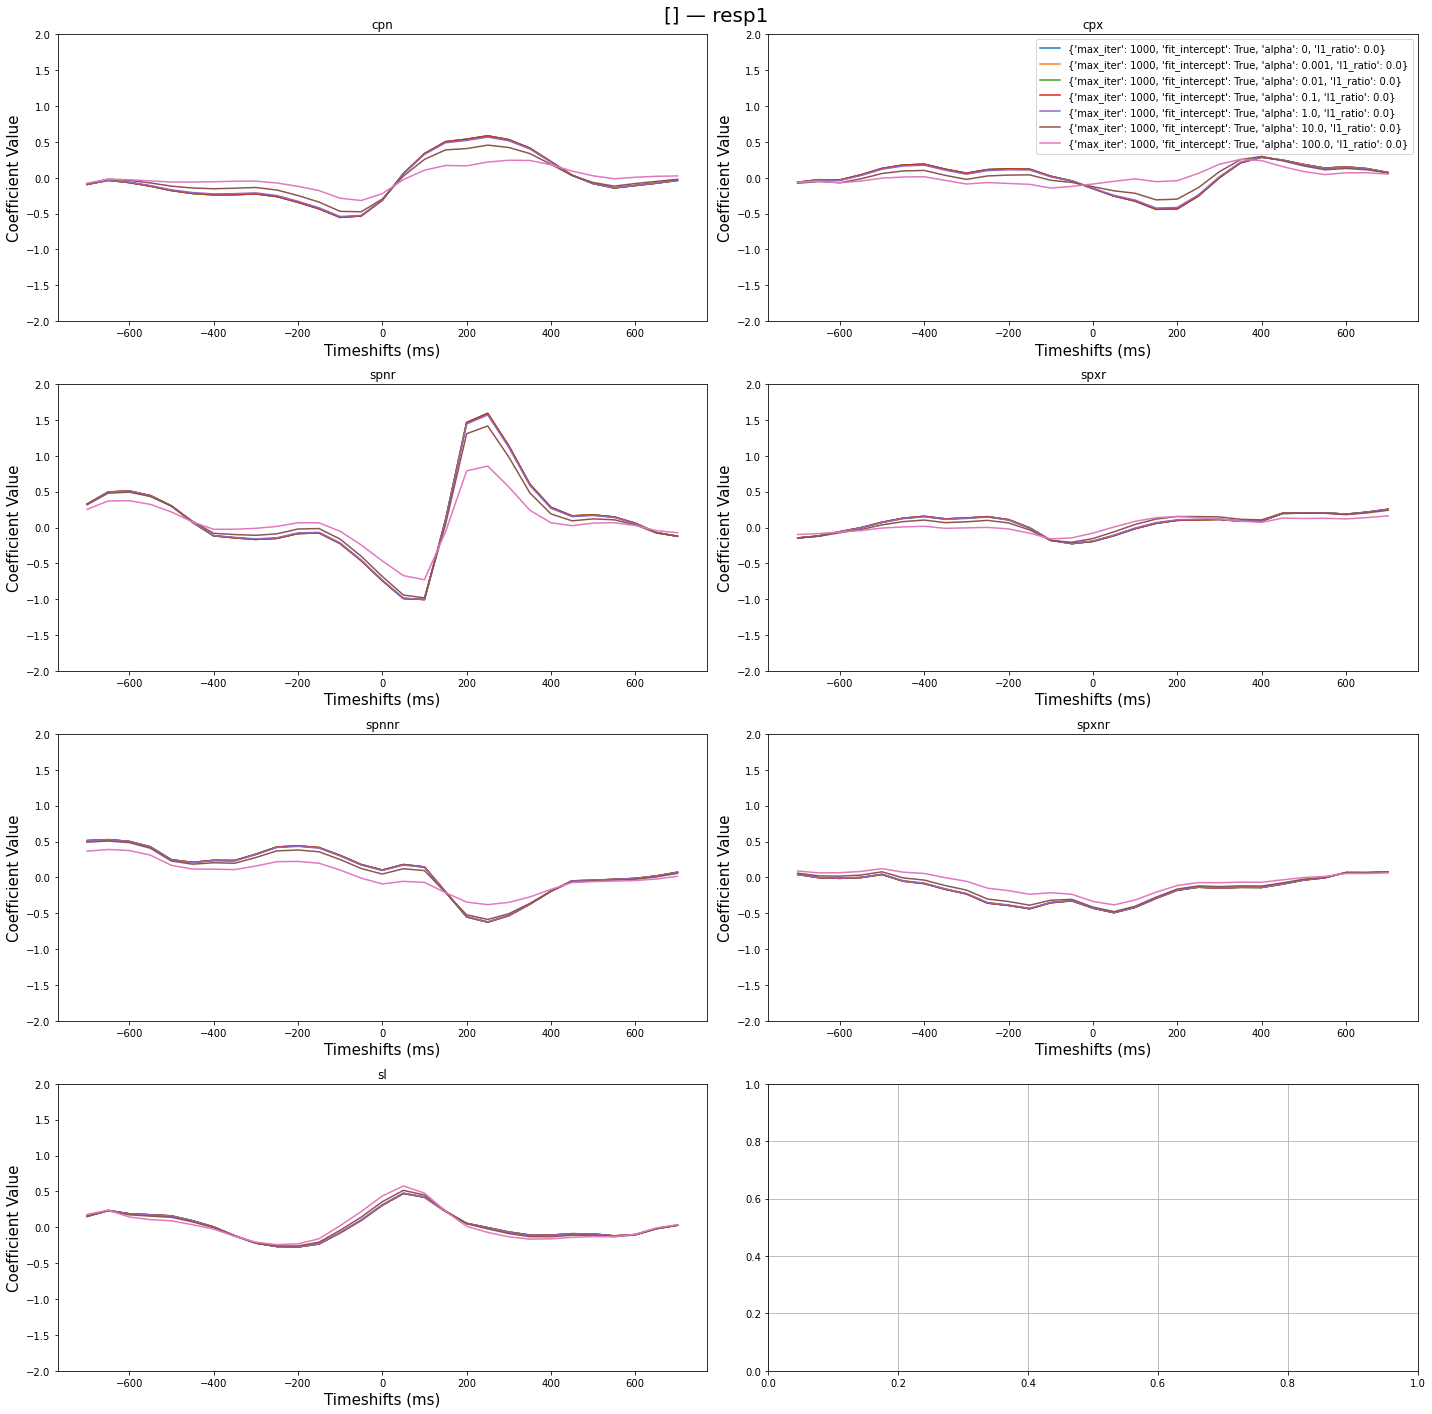

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

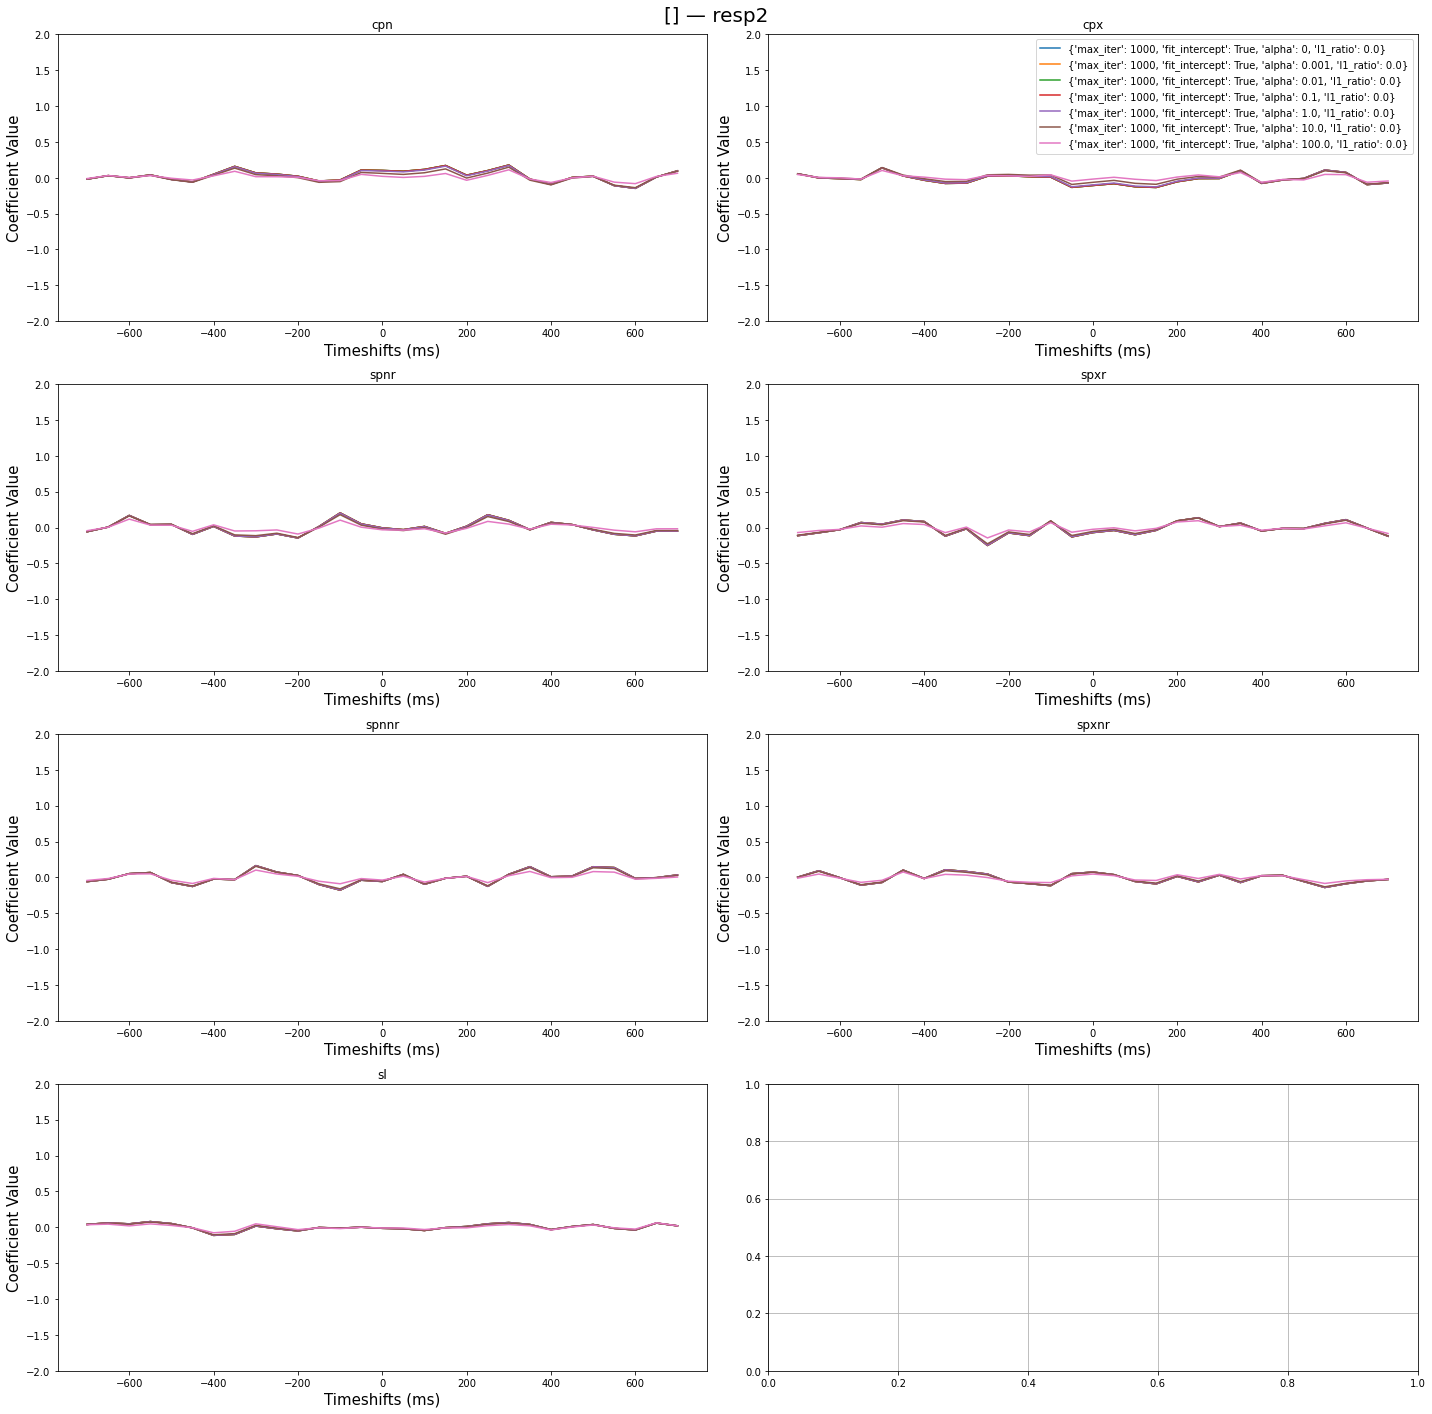

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

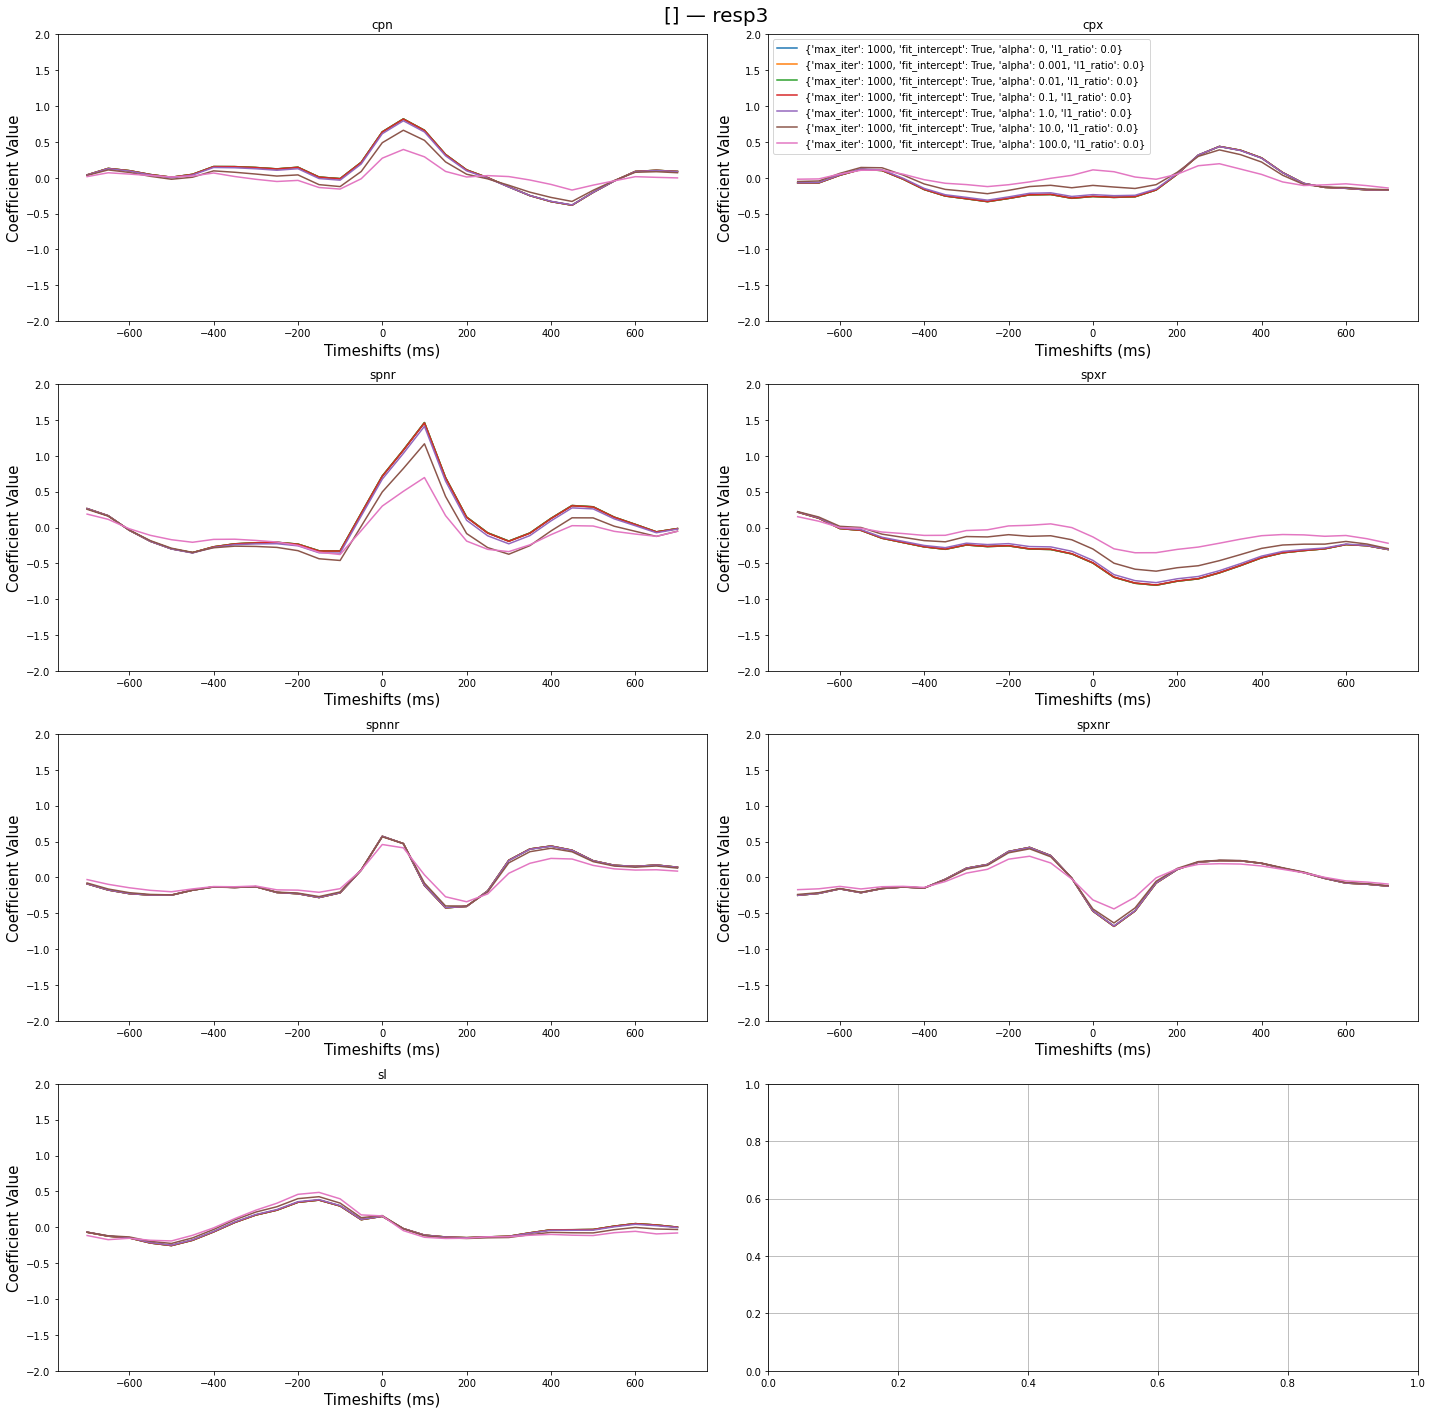

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

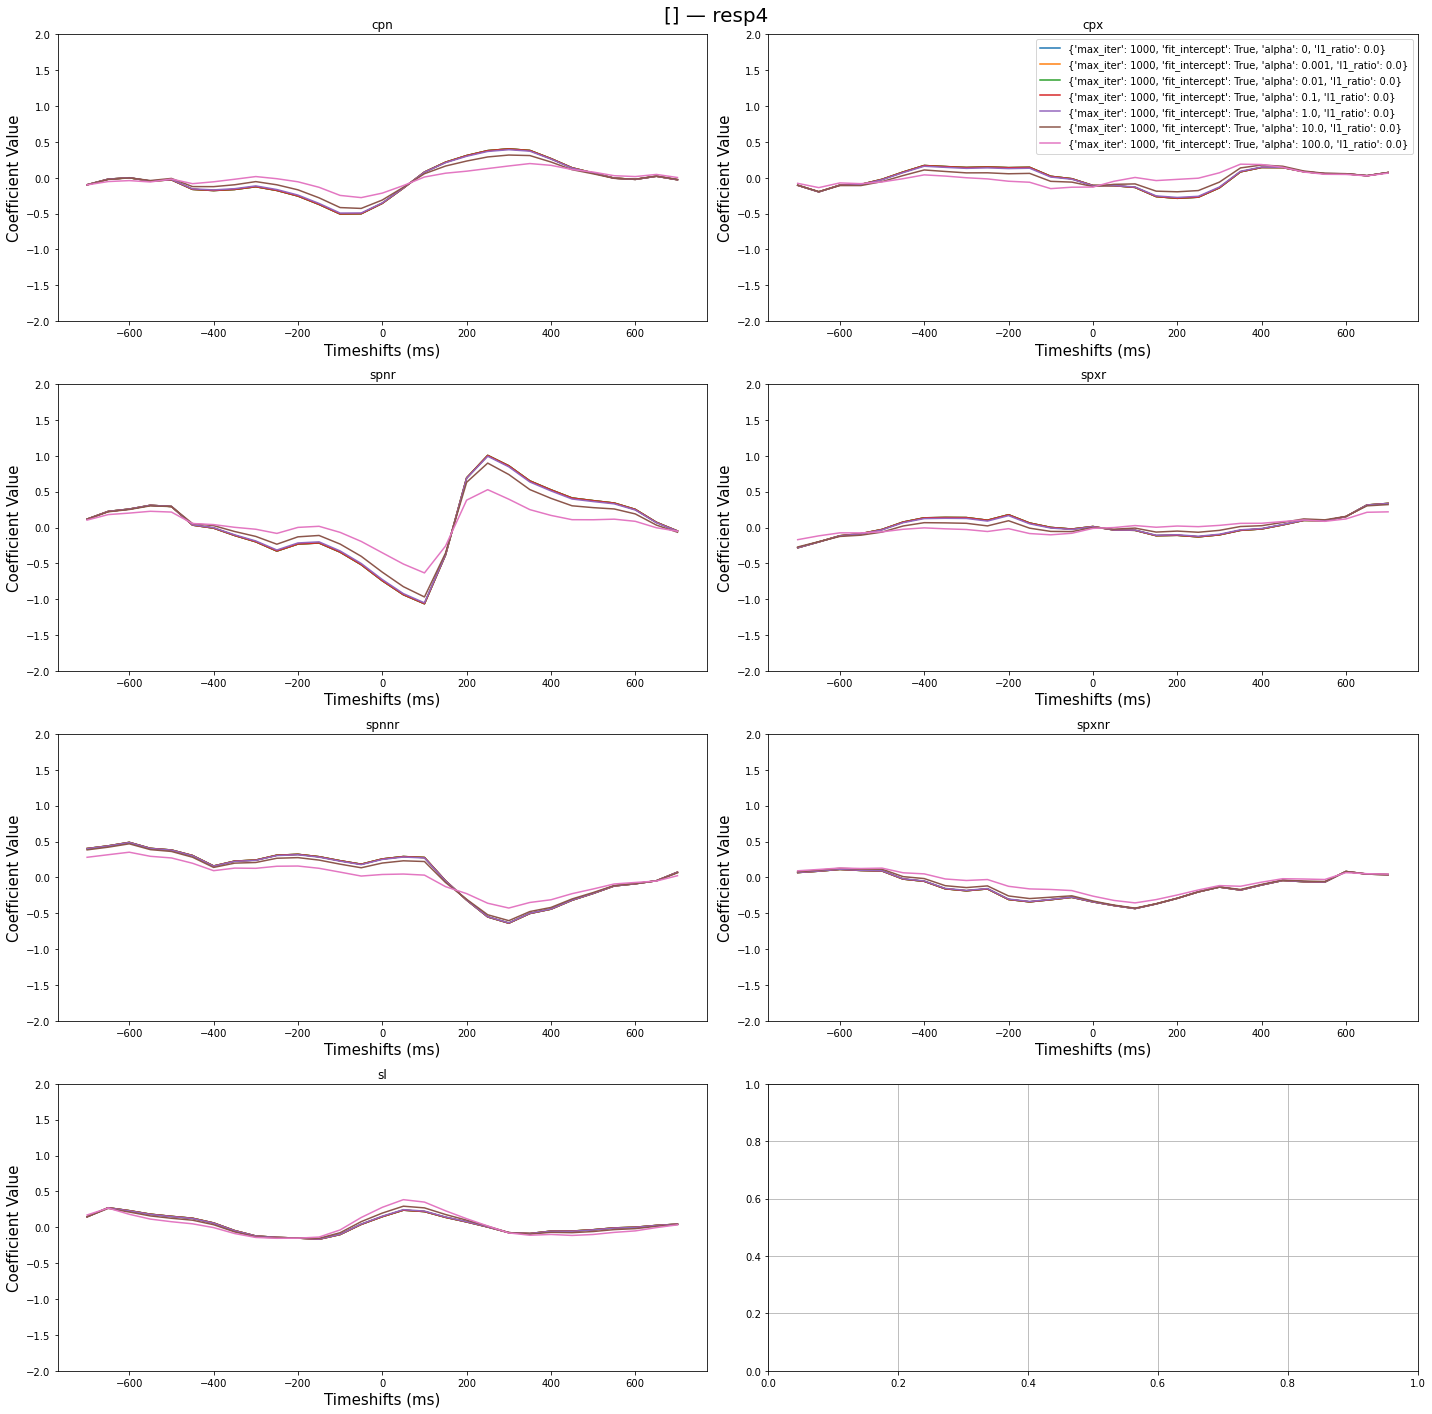

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

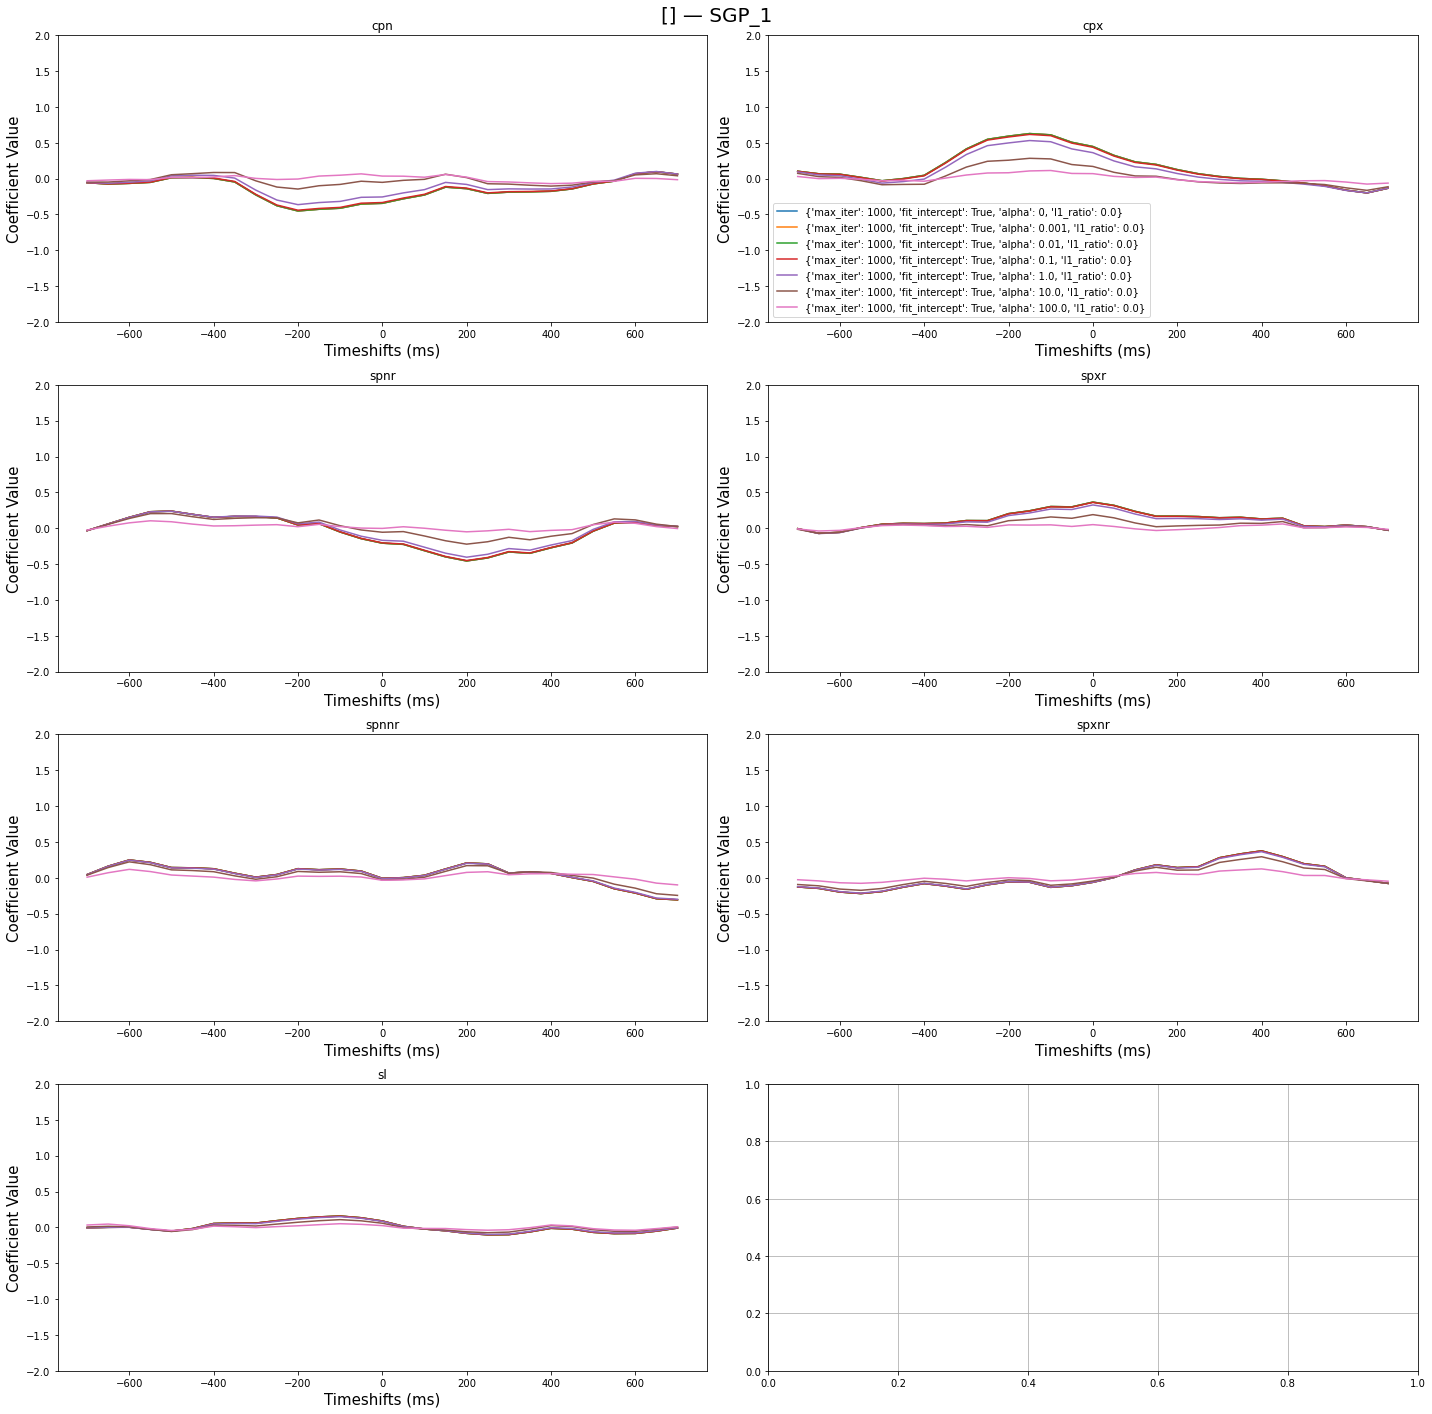

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

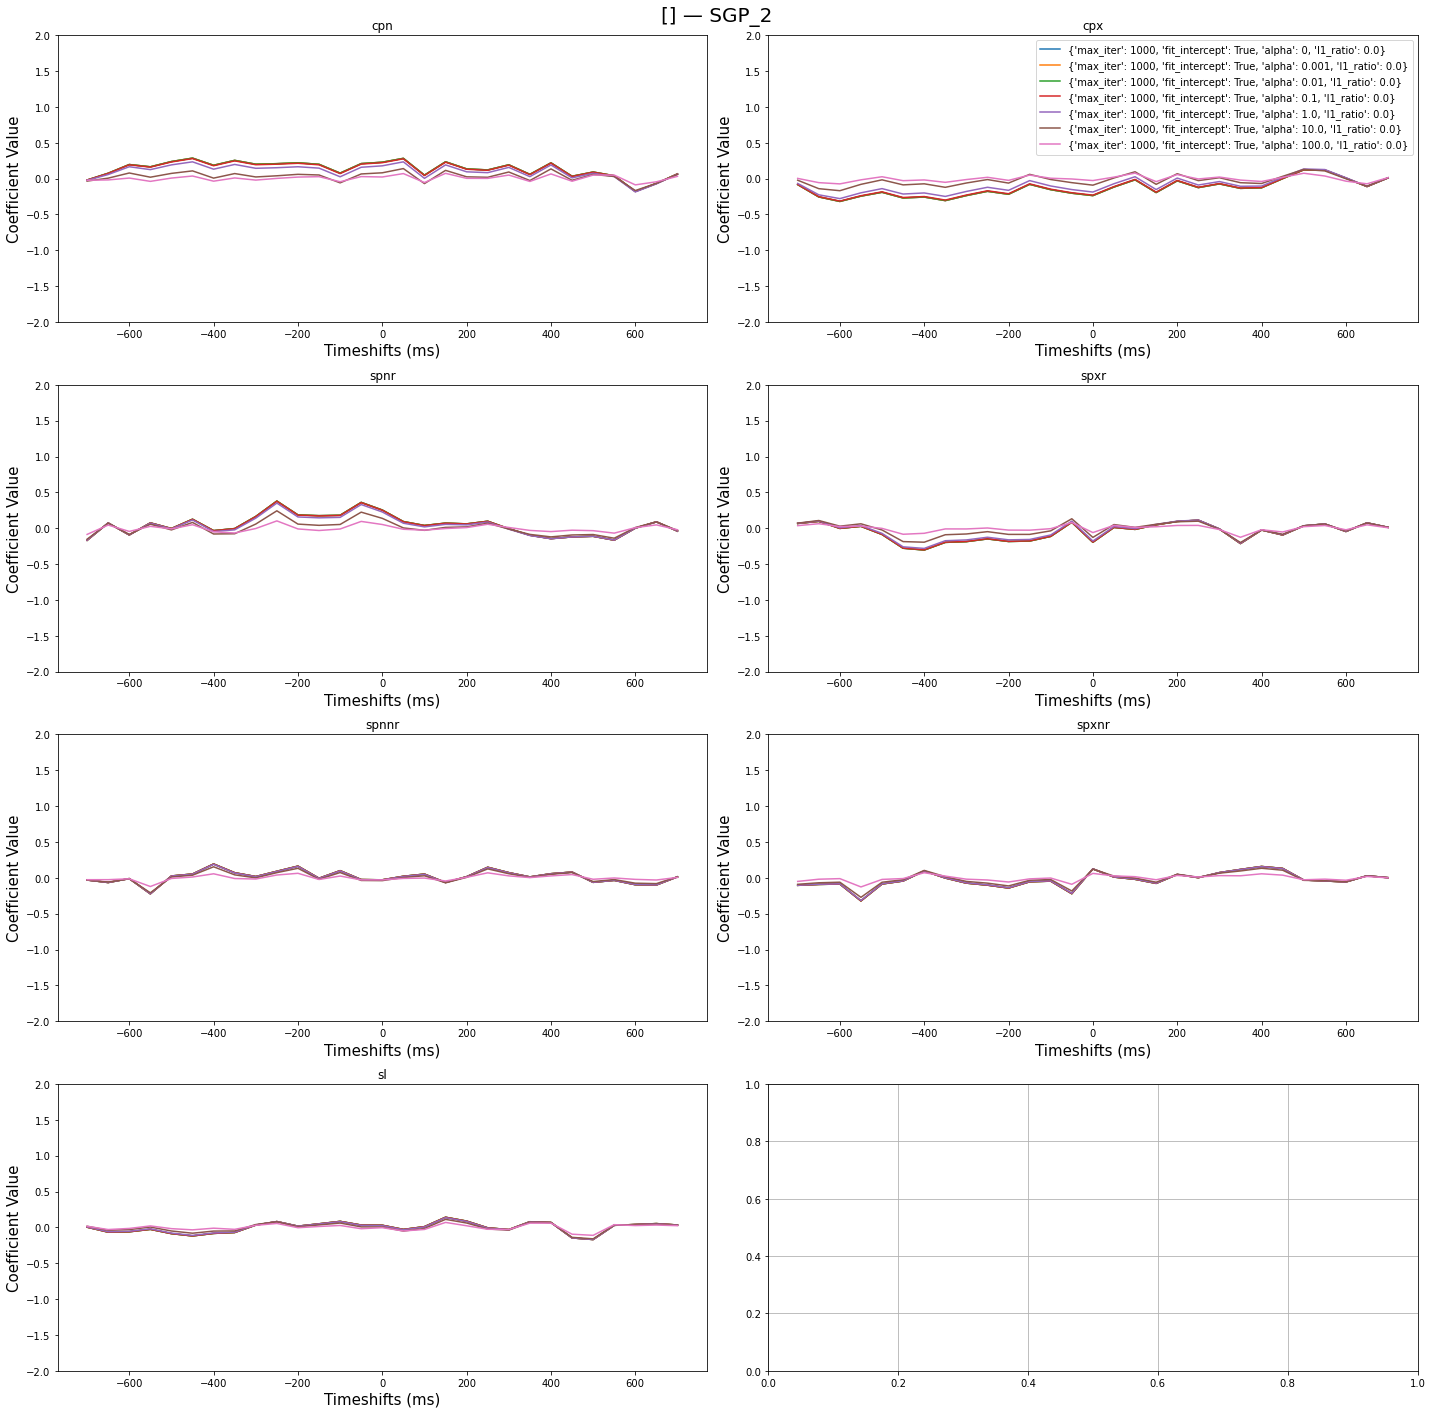

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

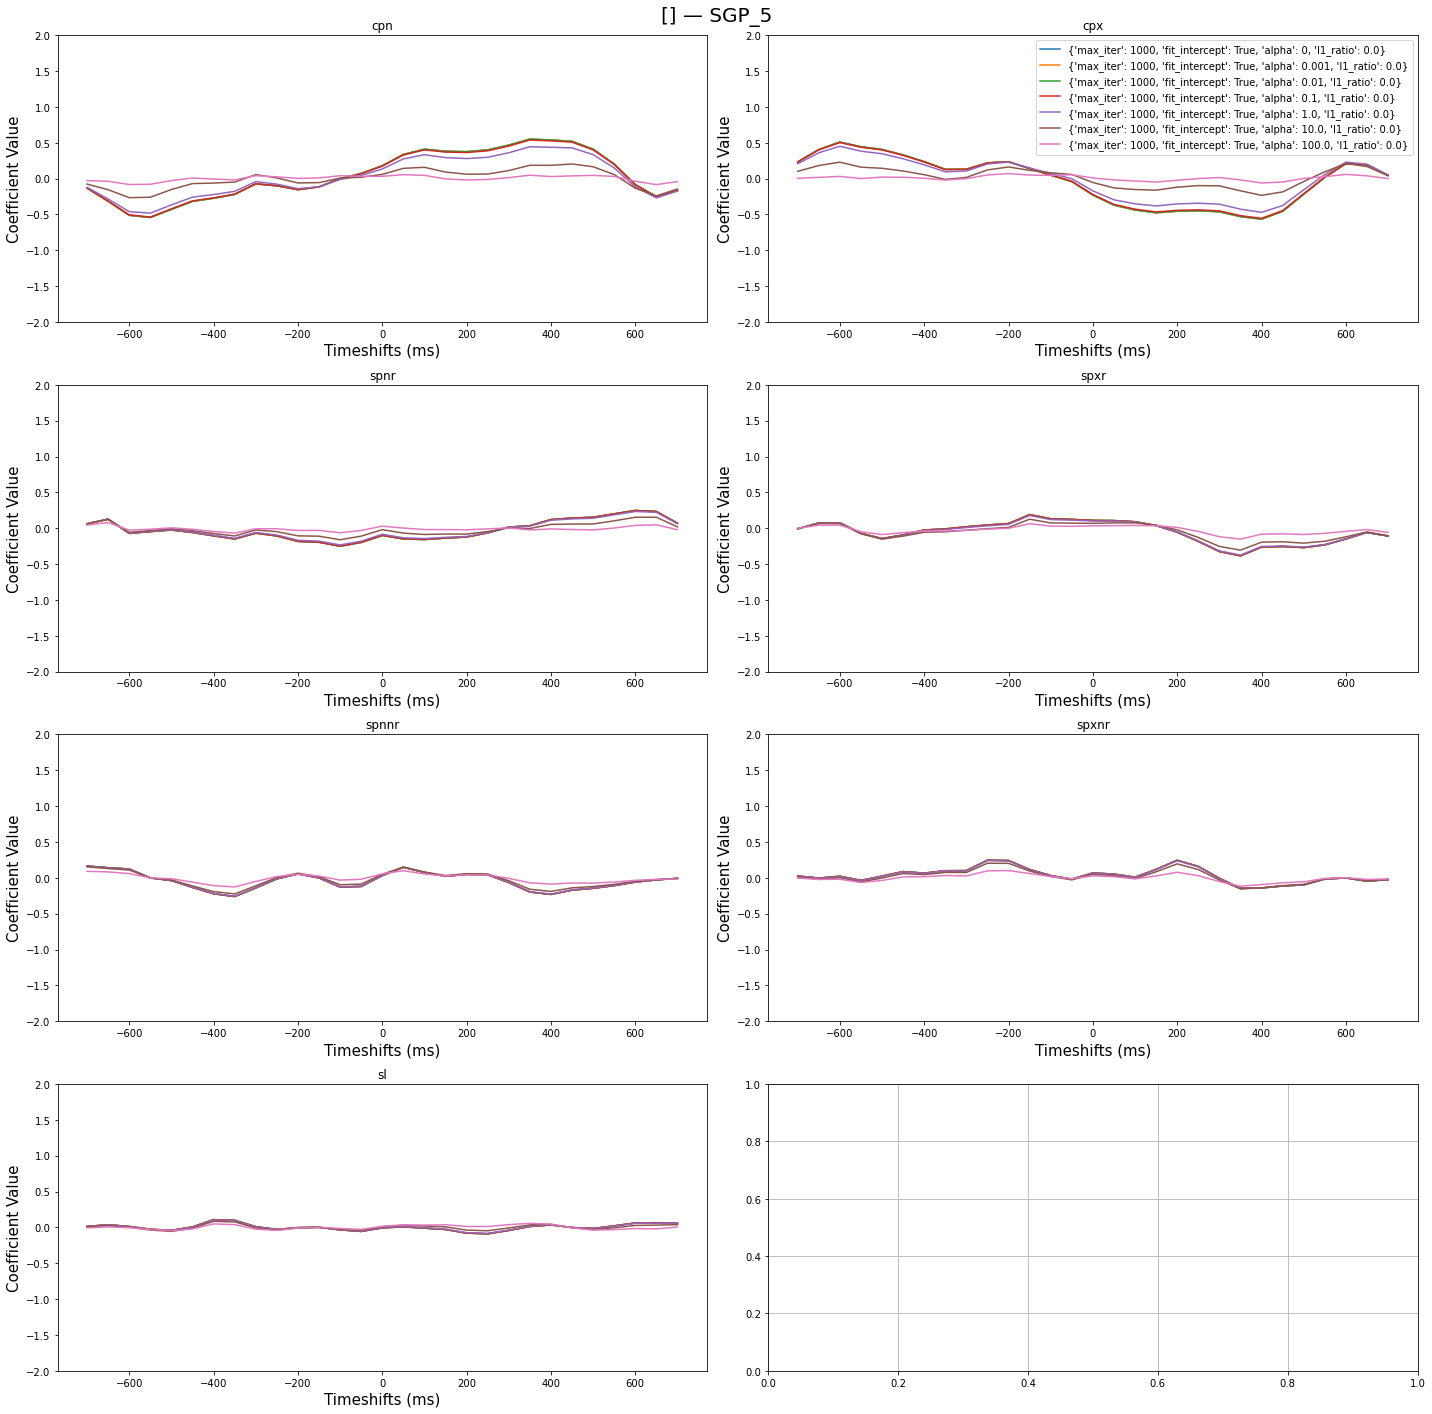

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

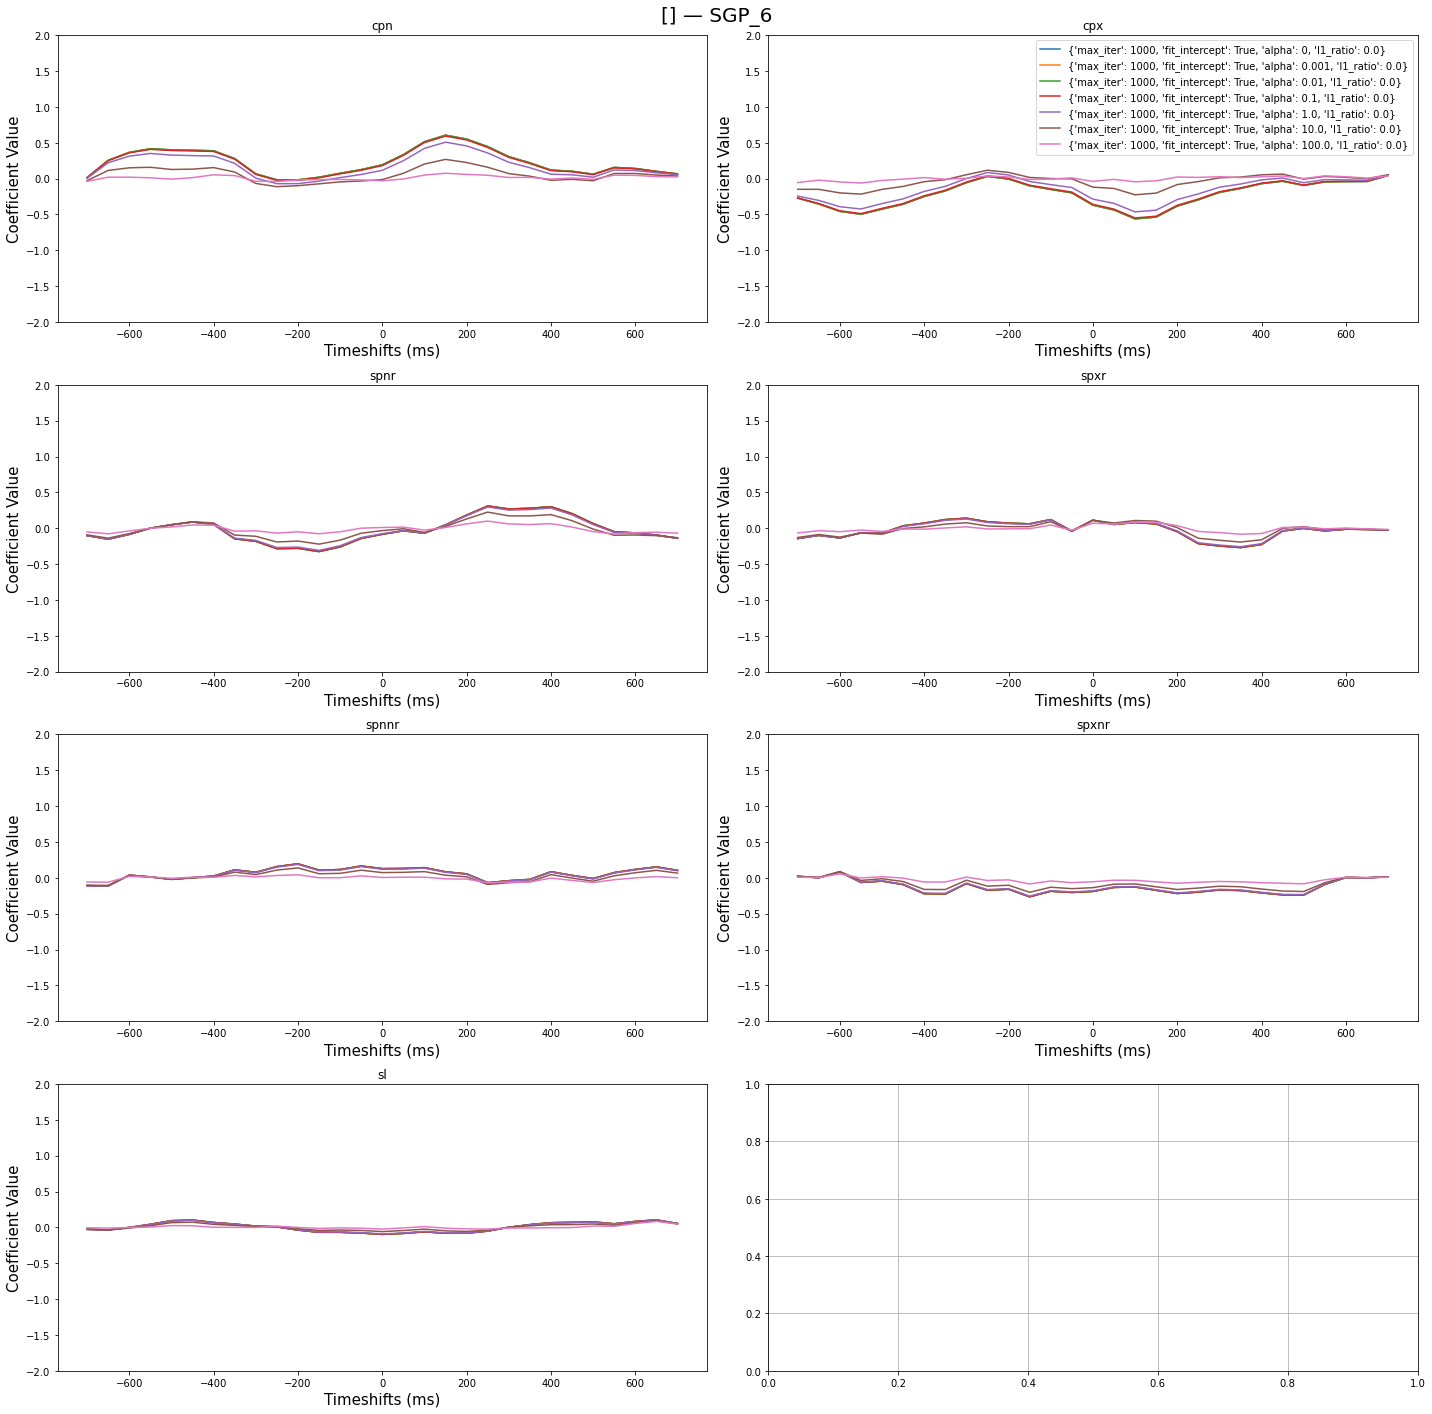

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt

fit_res = [_ for _ in gdat.data['fit_results']]
prv_res = None

for ifr, fr in enumerate(fit_res):
    dc = fr['dropped_cols']
    rc = fr['response_col']
    hp = fr['hyperparams']

    if hp['l1_ratio'] != 0:
        continue

    if len(dc) > 0 and dc[0] == 'nTrial':
        continue
    if hp['l1_ratio'] > 0.01:
        continue

    plt.figure()
    glm = fr['glm_model_gss']
    X_cols_plot = gdat.data['X_cols']
    X_cols_plot = [_ for _ in X_cols_plot if _ not in fr['dropped_cols']]
    X_cols_sftd_plot = sglm_ez.add_timeshifts_to_col_list(X_cols_plot, X_cols_plot[1:], neg_order=gdat.data['negorder'], pos_order=gdat.data['posorder'])
    X_cols_plot = [_ for _ in X_cols_plot if _ != 'nTrial']
    X_cols_sftd_plot = [_ for _ in X_cols_sftd_plot if _ != 'nTrial']

    # print(len(fr['dropped_cols']))
    # print(len(X_cols_plot))
    # print(len(X_cols_sftd_plot))

    if prv_res != rc:
        if prv_res is not None:
            axs[0,1].legend()
            for ax in axs.reshape(-1):
                ax.grid()
            plt.show()
        
        fig, axs = splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                            X_cols_sftd_plot,
                            plot_width=2,
                            y_lims=(-2.0, 2.0),
                            # filename=f'{fn}_coeffs.png',
                            binsize=50,
                            plot_name=f'{dc} — {rc}',
                            # label='Mean Coefficients'
                            label=f'{hp}'
                            )
    else:
        splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                            X_cols_sftd_plot,
                            plot_width=2,
                            y_lims=(-2.0, 2.0),
                            binsize=50,
                            plot_name=f'{dc} — {rc}',
                            fig=fig,
                            axs=axs,
                            label=f'{hp}'
                            )
    prv_res = rc


axs[0,1].legend()
for ax in axs.reshape(-1):
    ax.grid()
plt.show()

plt.close('all')


# Try an alpha of 100
# Compare the proportional compression of L1/L2 regularization
# 1. Increase the richness of hte model to fit better
# 2. Start running analyses across all sessions for the animal
# 3. Take regression -- only on all channels

<Figure size 432x288 with 0 Axes>

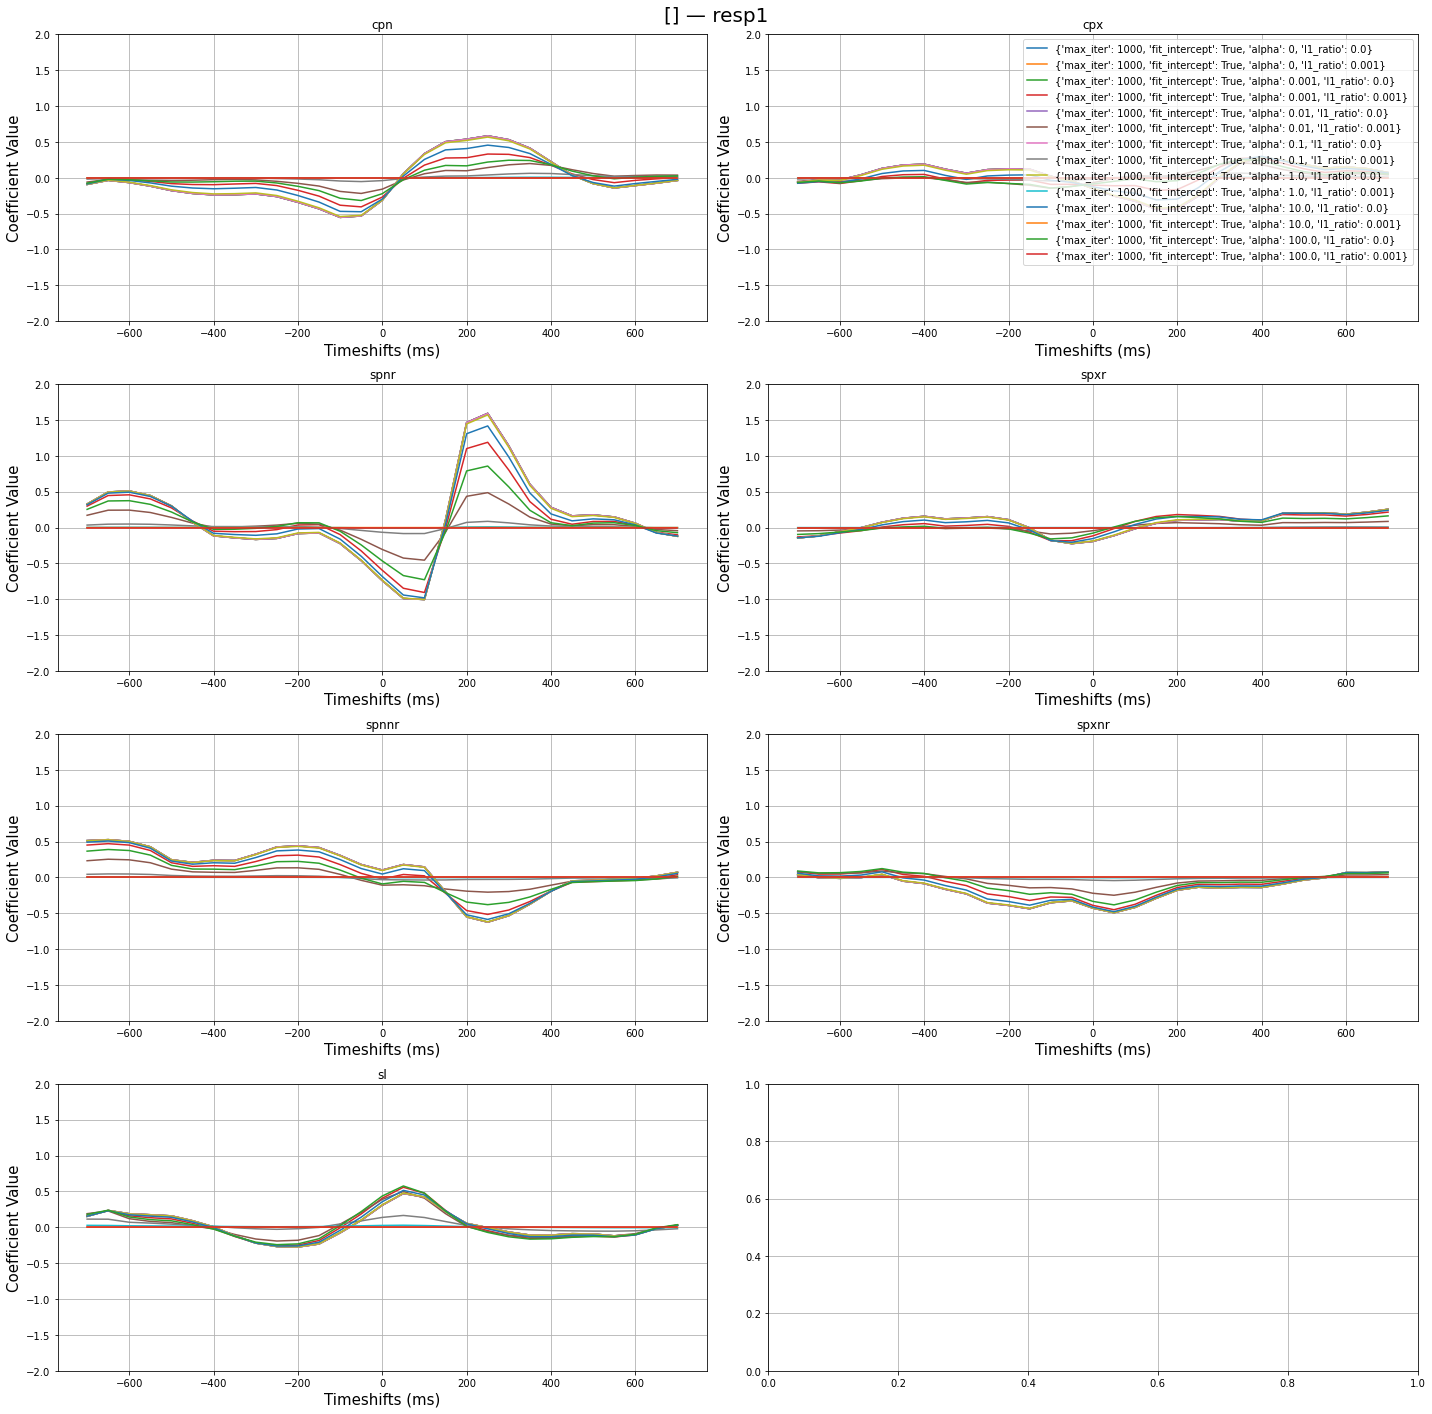

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

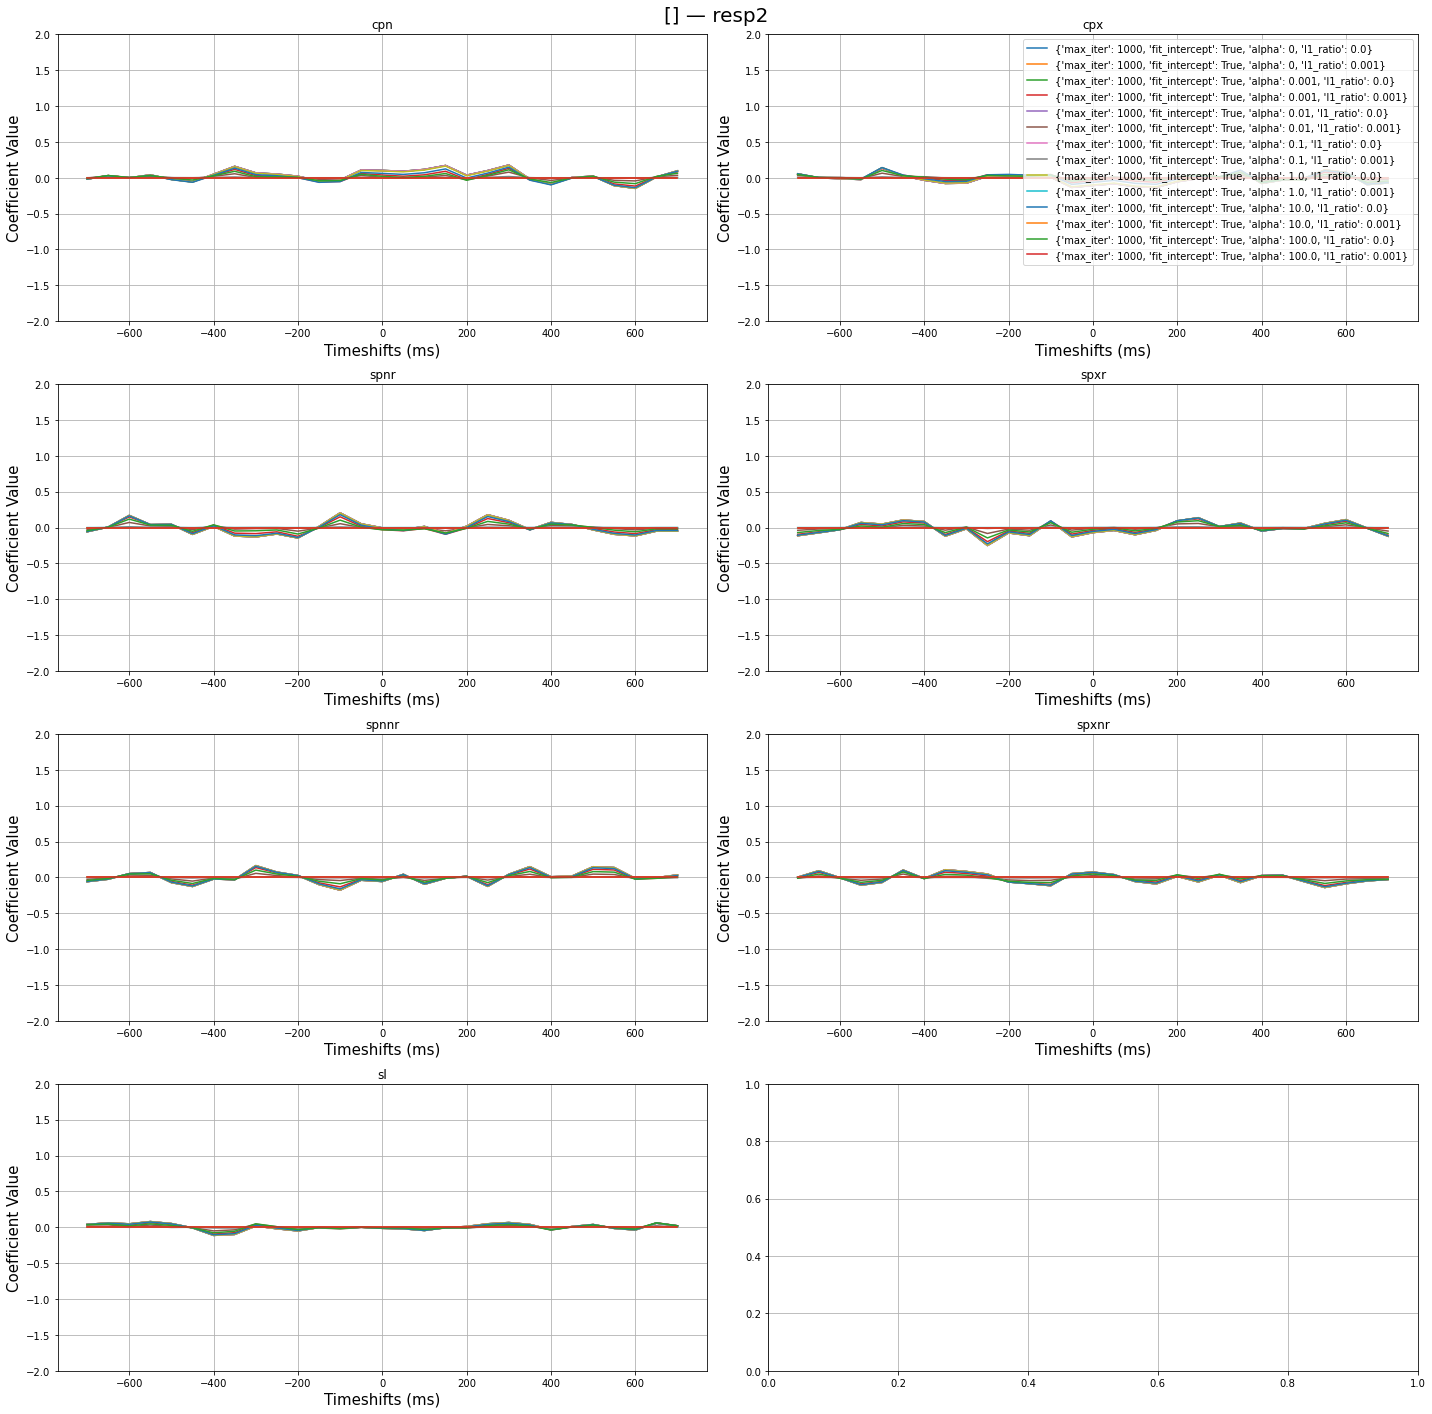

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

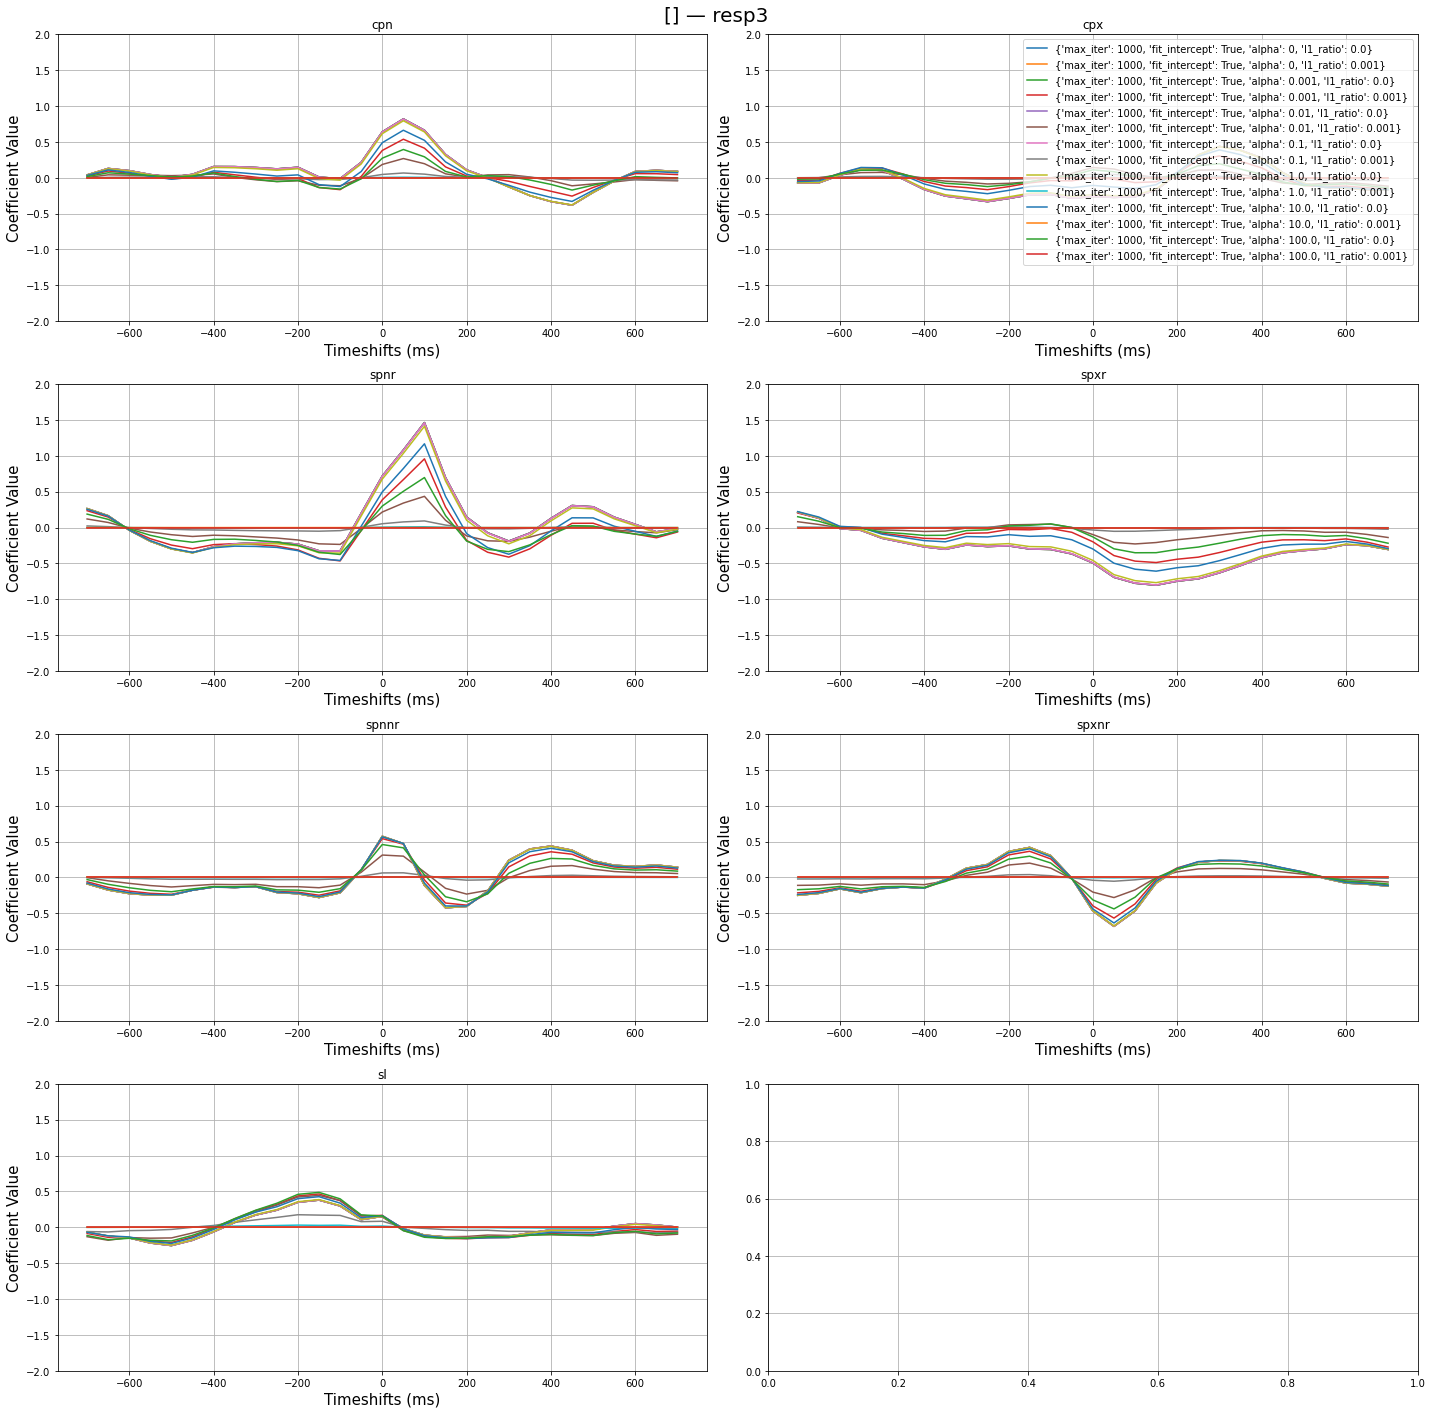

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

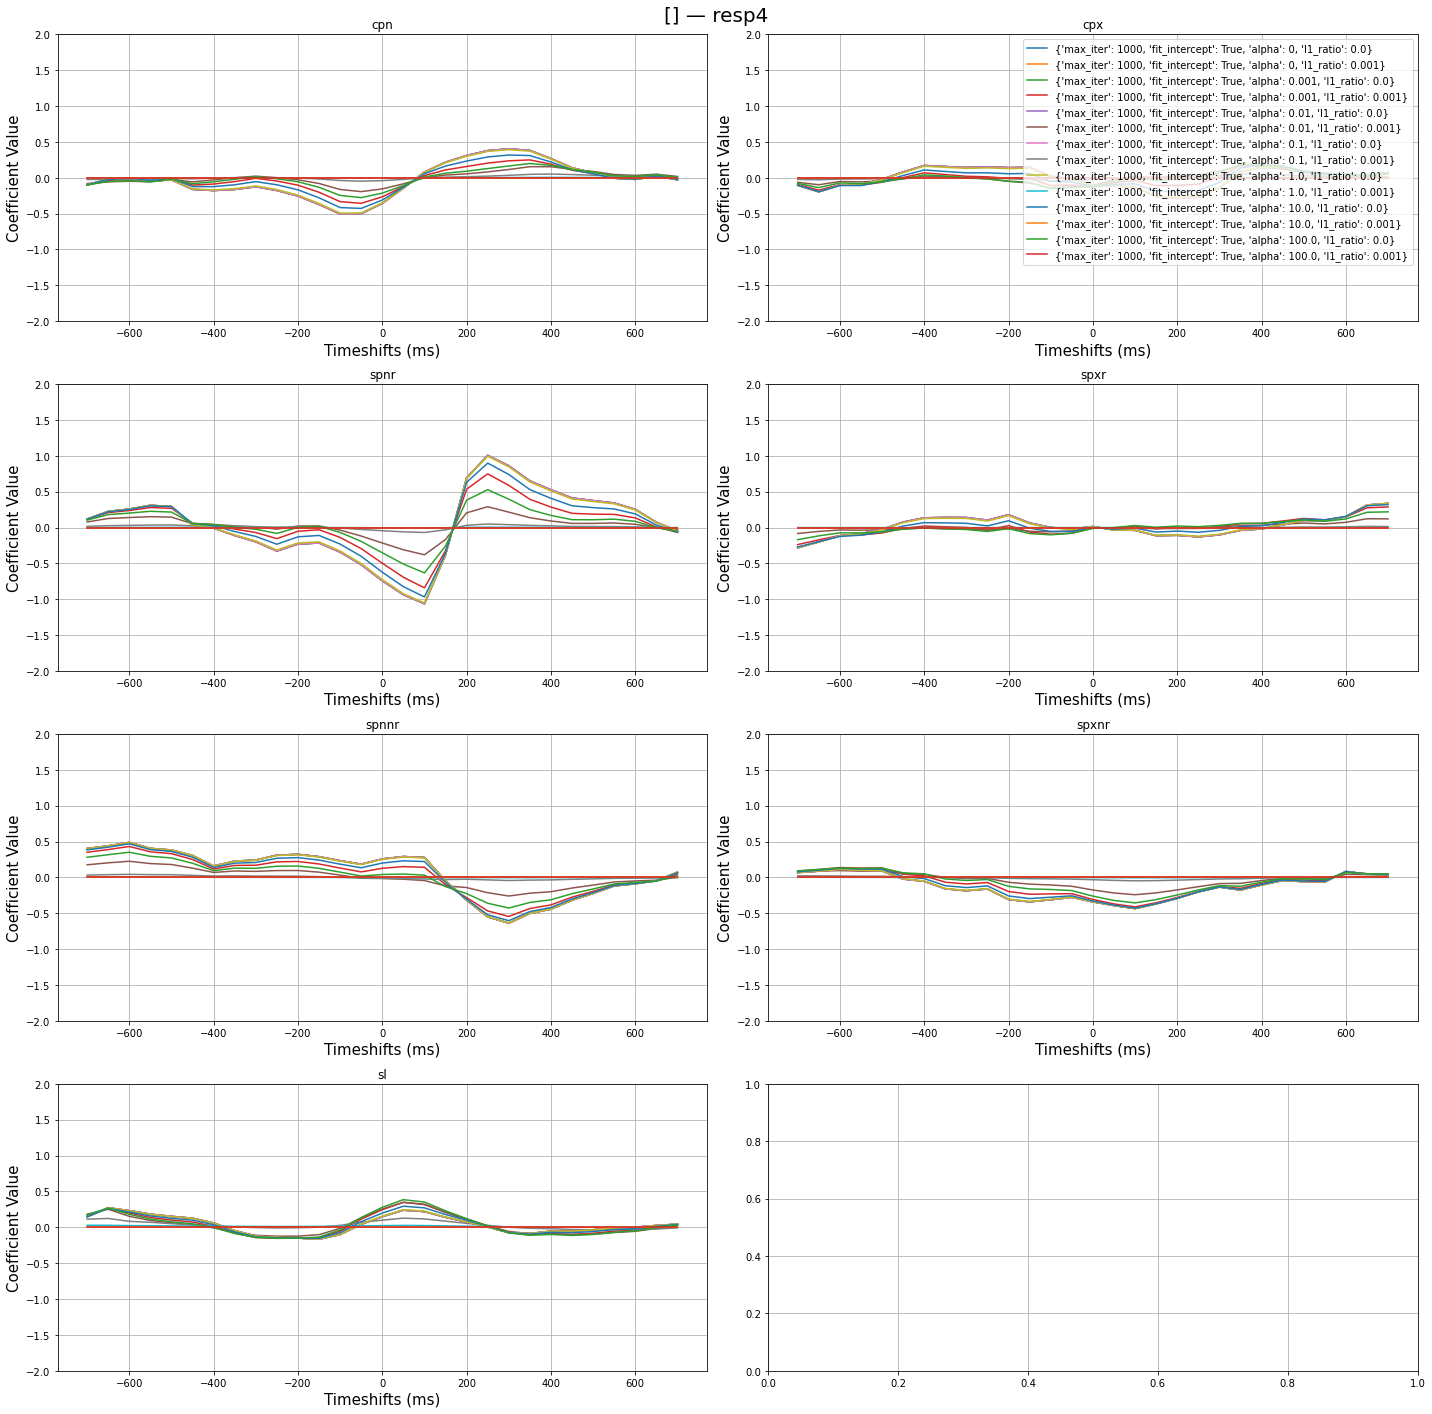

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

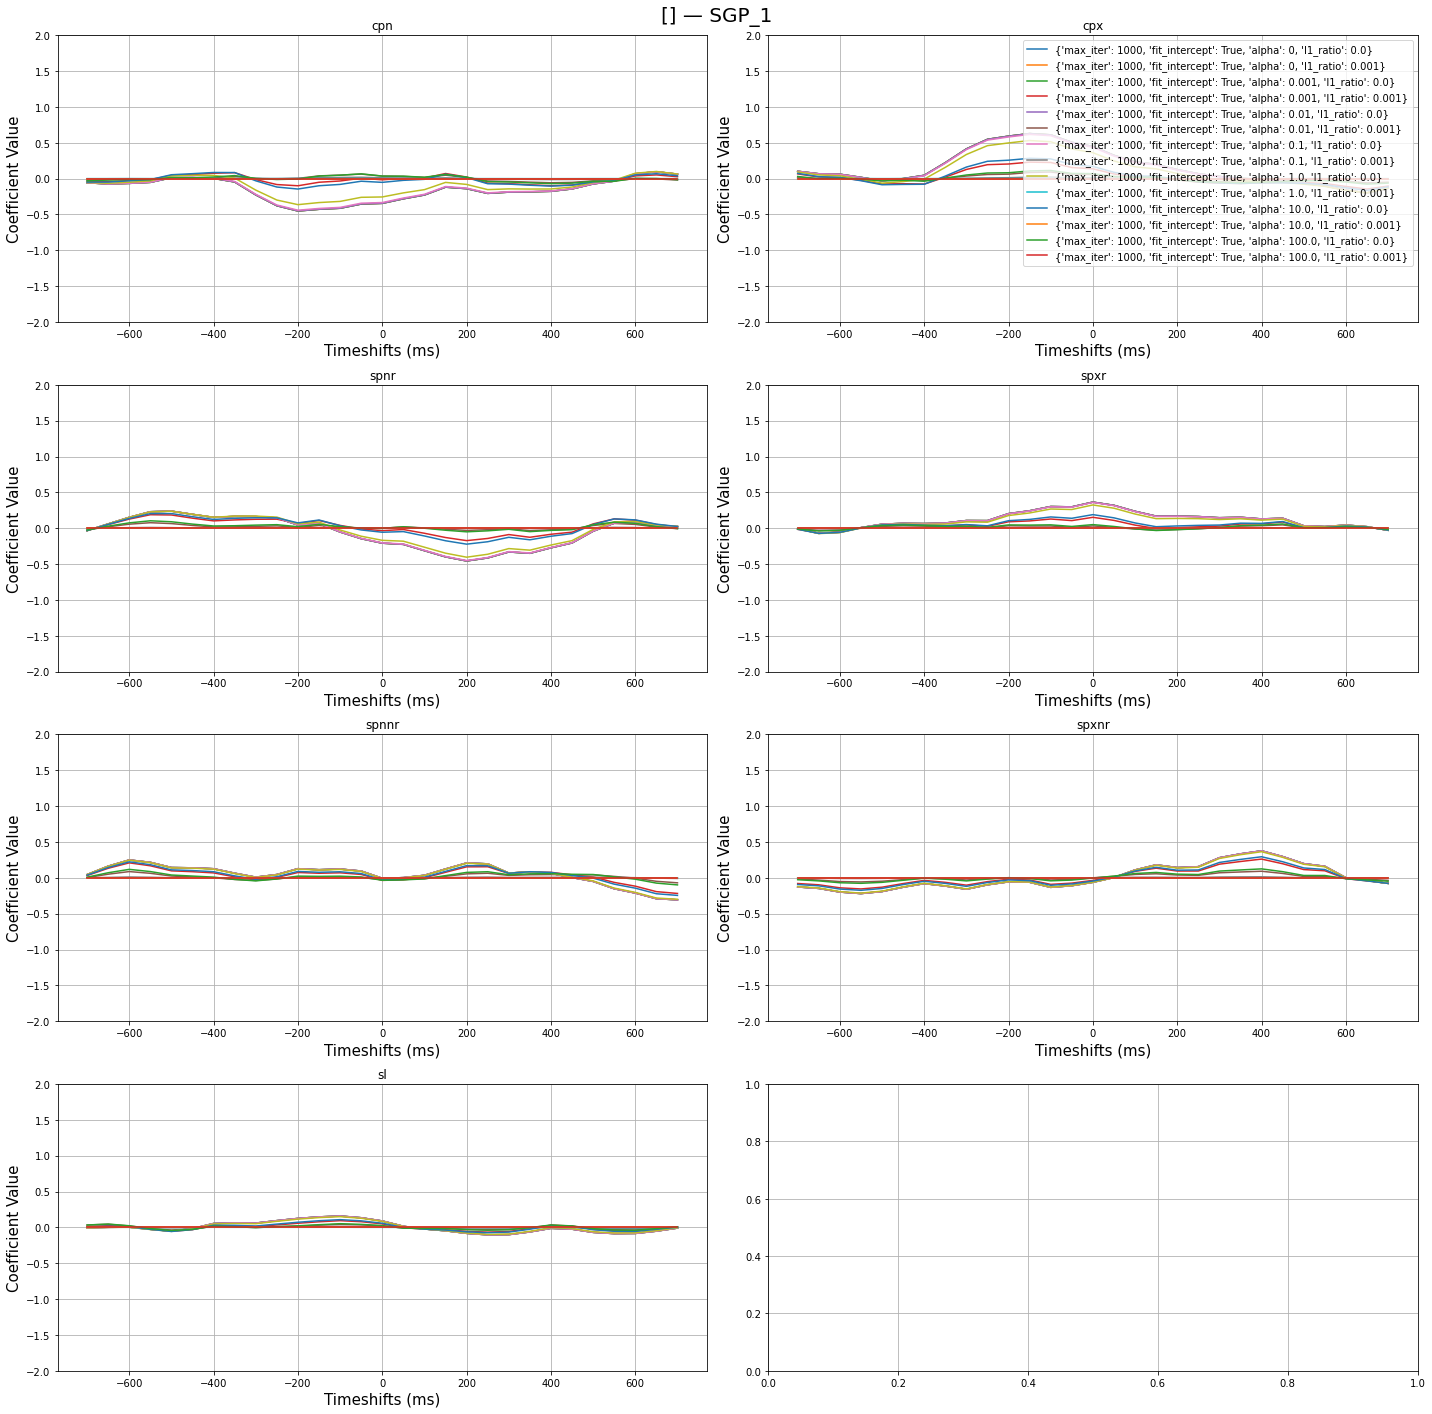

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

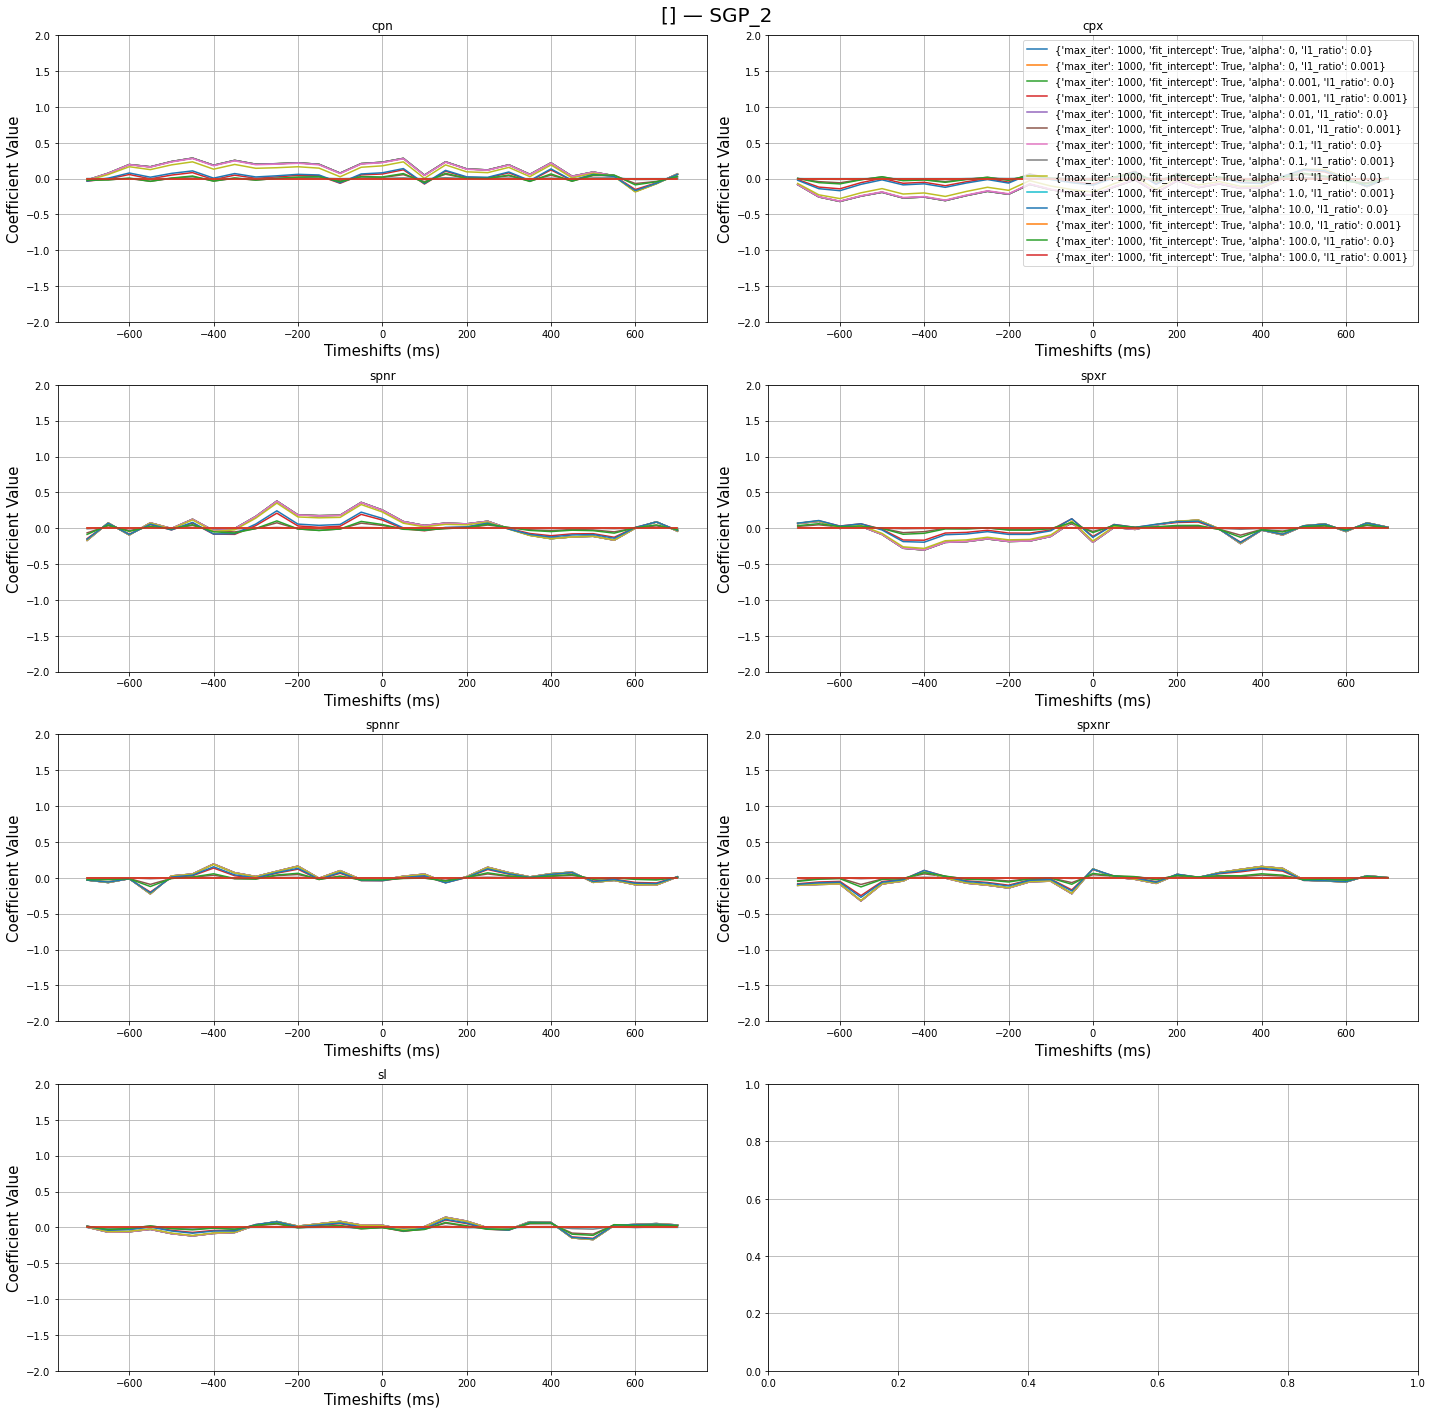

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

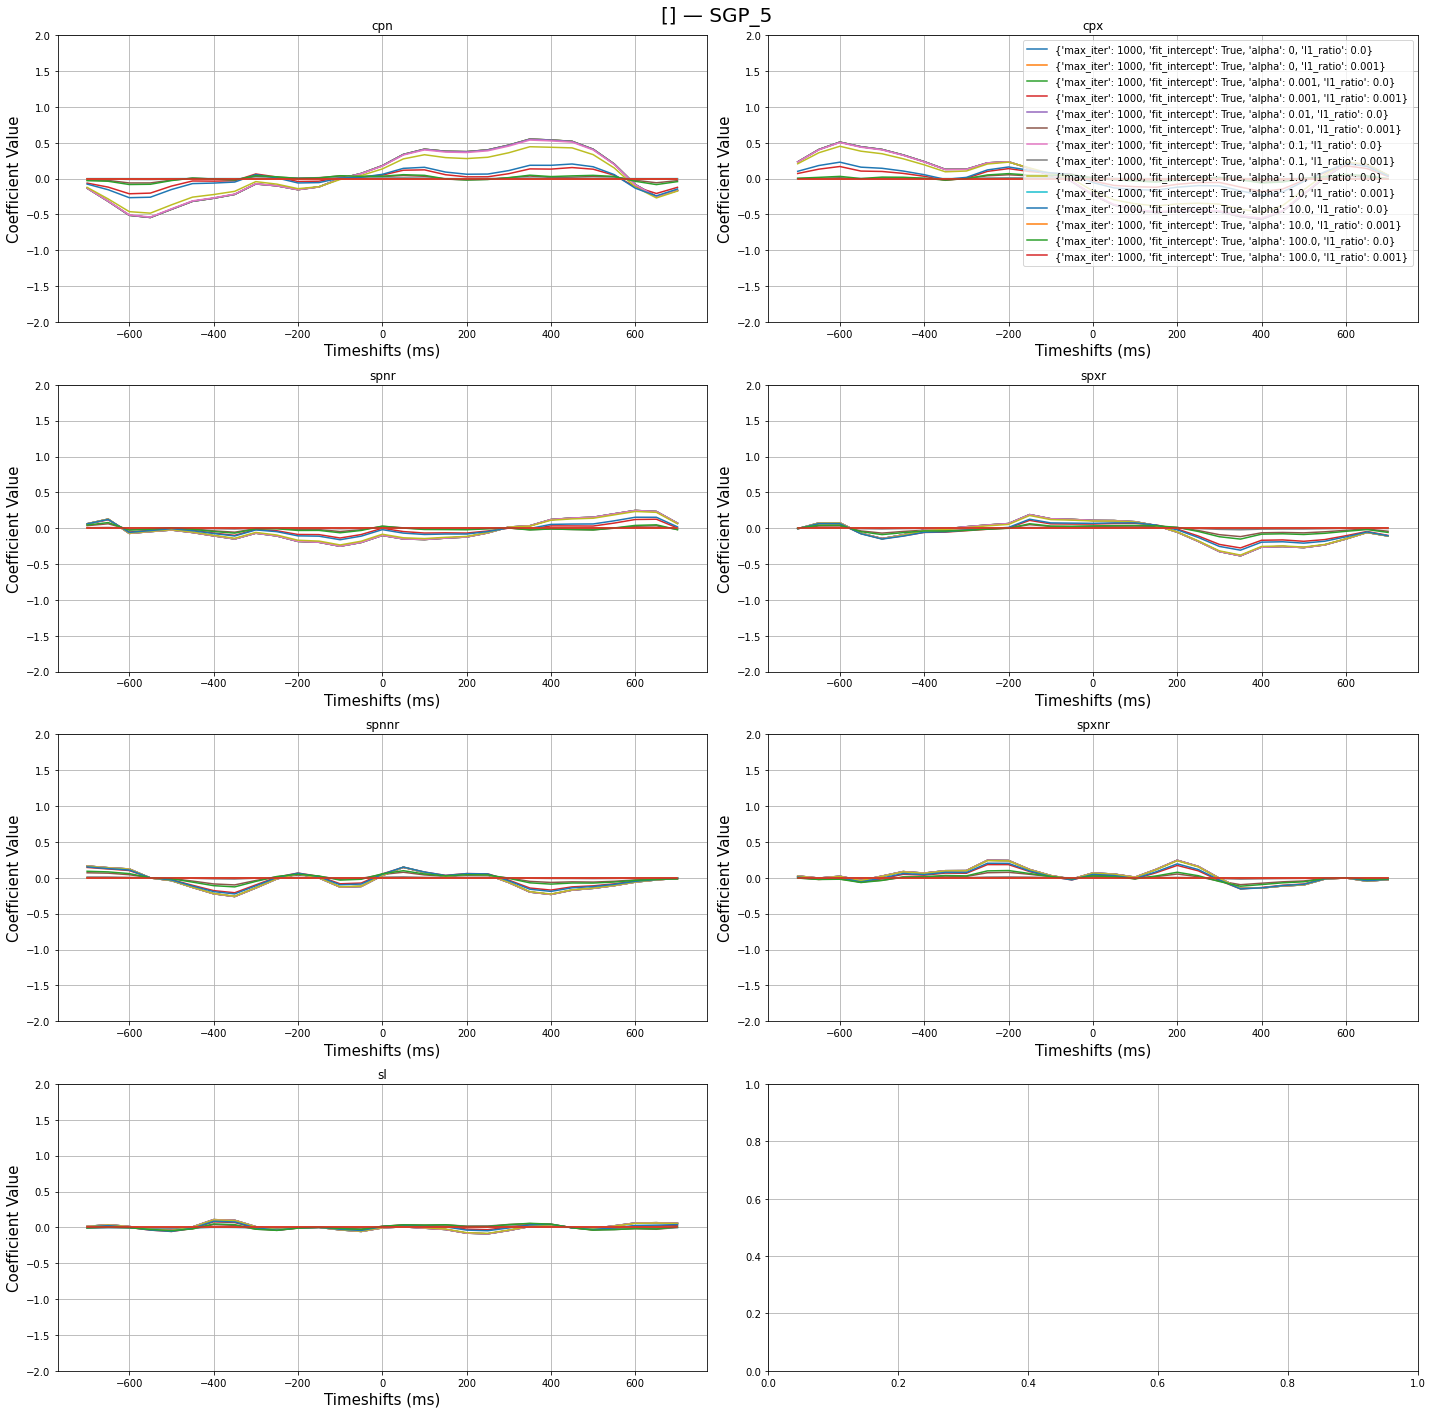

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

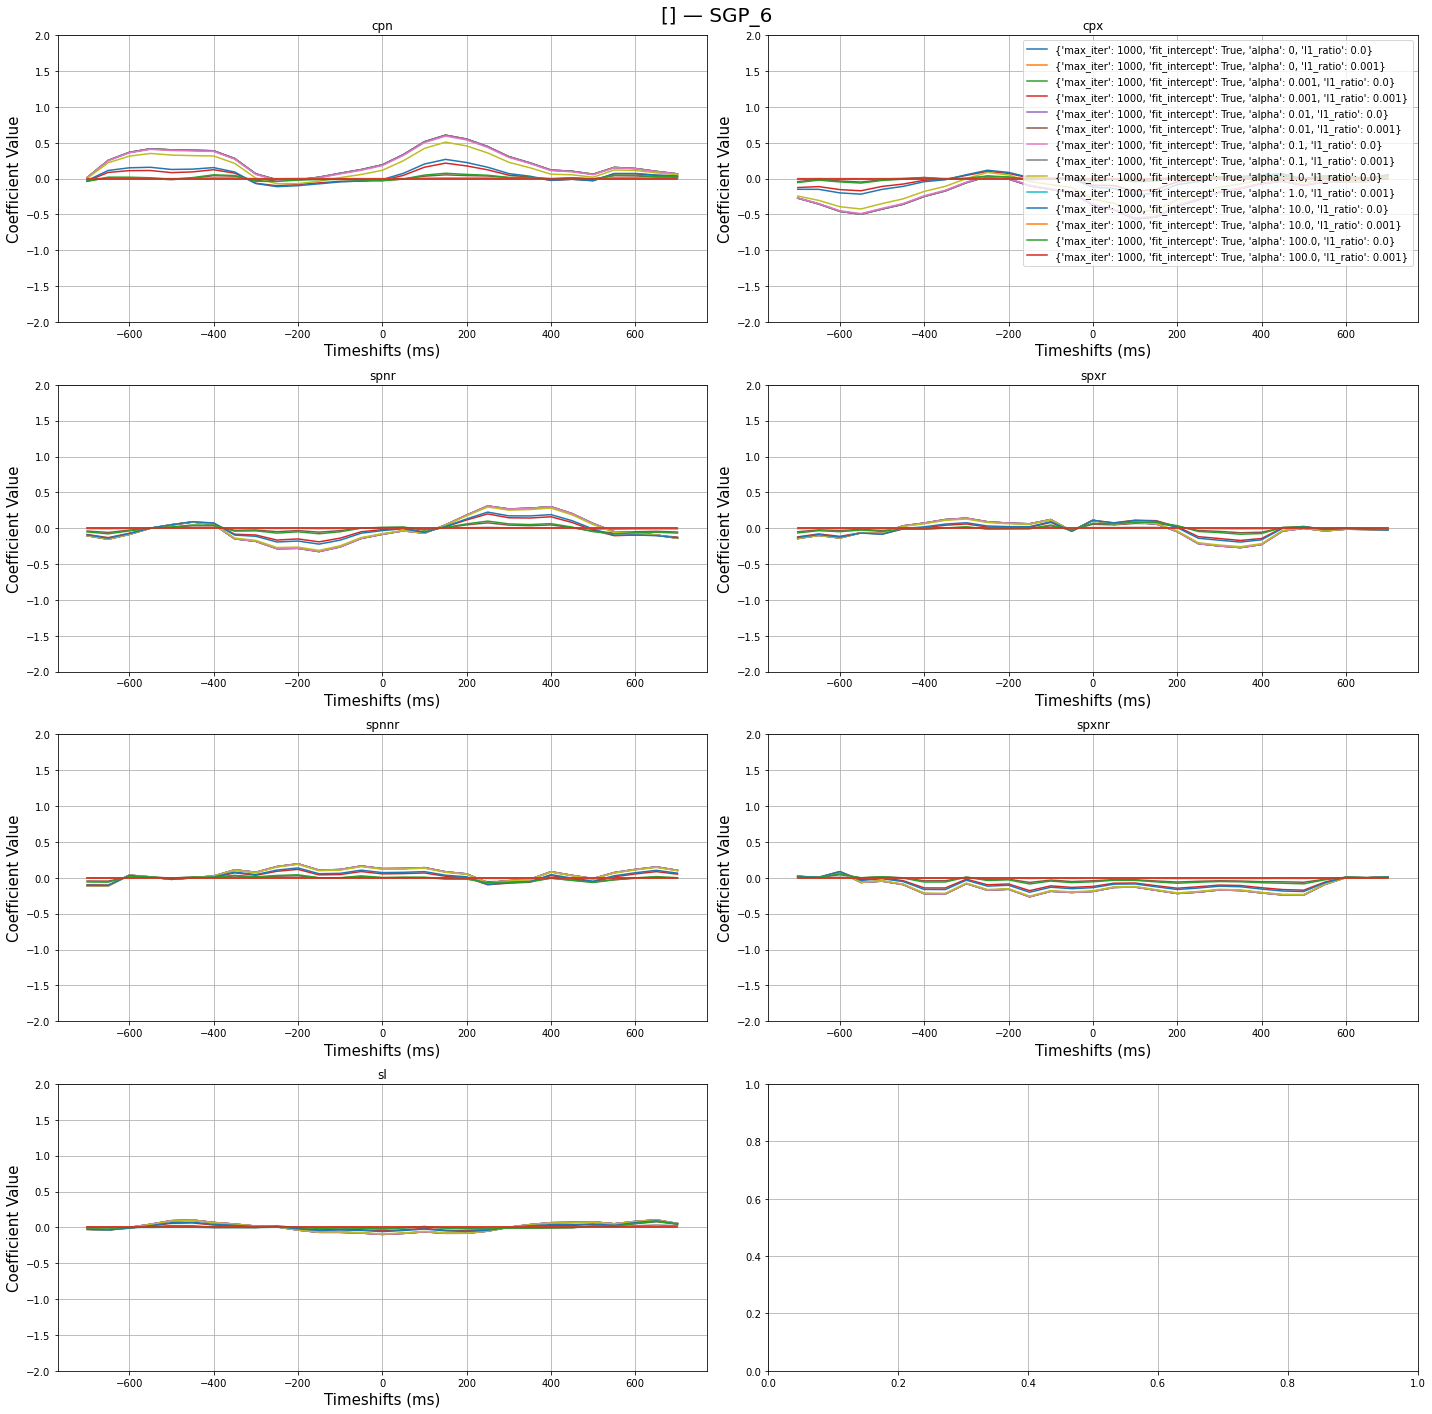

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt

fit_res = [_ for _ in gdat.data['fit_results']]
prv_res = None

for ifr, fr in enumerate(fit_res):
    dc = fr['dropped_cols']
    rc = fr['response_col']
    hp = fr['hyperparams']

    if len(dc) > 0 and dc[0] == 'nTrial':
        continue
    if hp['l1_ratio'] > 0.01:
        continue

    plt.figure()
    glm = fr['glm_model_gss']
    X_cols_plot = gdat.data['X_cols']
    X_cols_plot = [_ for _ in X_cols_plot if _ not in fr['dropped_cols']]
    X_cols_sftd_plot = sglm_ez.add_timeshifts_to_col_list(X_cols_plot, X_cols_plot[1:], neg_order=gdat.data['negorder'], pos_order=gdat.data['posorder'])
    X_cols_plot = [_ for _ in X_cols_plot if _ != 'nTrial']
    X_cols_sftd_plot = [_ for _ in X_cols_sftd_plot if _ != 'nTrial']

    # print(len(fr['dropped_cols']))
    # print(len(X_cols_plot))
    # print(len(X_cols_sftd_plot))

    if prv_res != rc:
        if prv_res is not None:
            axs[0,1].legend()
            for ax in axs.reshape(-1):
                ax.grid()
            plt.show()
        
        fig, axs = splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                            X_cols_sftd_plot,
                            plot_width=2,
                            y_lims=(-2.0, 2.0),
                            # filename=f'{fn}_coeffs.png',
                            binsize=50,
                            plot_name=f'{dc} — {rc}',
                            # label='Mean Coefficients'
                            label=f'{hp}'
                            )
    else:
        splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                            X_cols_sftd_plot,
                            plot_width=2,
                            y_lims=(-2.0, 2.0),
                            binsize=50,
                            plot_name=f'{dc} — {rc}',
                            fig=fig,
                            axs=axs,
                            label=f'{hp}'
                            )
    prv_res = rc


axs[0,1].legend()
for ax in axs.reshape(-1):
    ax.grid()
plt.show()

plt.close('all')

In [15]:

# sys.path.append(f'./sabatinilab-glm/backend')
# sys.path.append(f'./..')
# sys.path.append(f'./backend')
# sys.path.append(f'./../backend')
# import sglm_plt as splt
# # fig, axs = splt.plot_all_beta_coefs(mean_coeffs, X_cols_plot,
# #                         X_cols_sftd_plot,
# #                         plot_width=2,
# #                         y_lims=(-0.5, 0.5),
# #                         # filename=f'{fn}_coeffs.png',
# #                         binsize=50,
# #                         label='Mean Coefficients'
# #                         )

# for icoef, coef in enumerate(coef_lst):

#     splt.plot_all_beta_coefs(coef_lst[icoef], X_cols_plot,
#                             X_cols_sftd_plot,
#                             plot_width=2,
#                             y_lims=(-0.6, 0.6),
#                             # filename=f'{fn}_coeffs.png',
#                             binsize=50,
#                             fig=fig,
#                             axs=axs,
#                             label=f'Session {icoef+1} — {coef_fn_lst[icoef]}'
#                             )

# for ax in axs.reshape(-1):
#     ax.grid()

# axs[0, 0].legend()
# # break


In [16]:
# import matplotlib.pyplot as plt
# # for x_val in ['alpha', 'l1_ratio']:
# #     plt.figure()
# #     plt.scatter(df[x_val], df['holdout_witi'], alpha=0.2)
# #     plt.scatter(df[x_val], df['holdout_noiti'], alpha=0.2)
# #     plt.scatter(df[x_val], df['gss_witi'], alpha=0.2)
# #     plt.title(x_val)

# for q in ['zsgdFF', 'zsrdFF']:
#     dfq = df.query(f"response == '{q}'")
#     for x_val in ['alpha', 'l1_ratio']:
#         for y_val in ['alpha', 'l1_ratio']:
#             if x_val == y_val:
#                 continue
#             plt.figure()
#             plt.scatter(dfq[x_val], dfq[y_val], c=dfq['holdout_witi'], alpha=0.2)
#             plt.colorbar()
#             plt.title(q + ' - ' + x_val + '/' + y_val + ' - ' + 'holdout_witi')
#             plt.figure()
#             plt.scatter(dfq[x_val], dfq[y_val], c=dfq['holdout_noiti'], alpha=0.2)
#             plt.colorbar()
#             plt.title(q + ' - ' + x_val + '/' + y_val + ' - ' + 'holdout_noiti')
#             plt.figure()
#             plt.scatter(dfq[x_val], dfq[y_val], c=dfq['gss_witi'], alpha=0.2)
#             plt.colorbar()
#             plt.title(q + ' - ' + x_val + '/' + y_val + ' - ' + 'gss_witi')


In [17]:
# for x_val in ['alpha', 'l1_ratio']:
#     plt.figure()
#     plt.scatter(df[x_val], df['holdout_witi'], alpha=0.2)
#     plt.scatter(df[x_val], df['holdout_noiti'], alpha=0.2)
#     plt.scatter(df[x_val], df['gss_witi'], alpha=0.2)
#     plt.title(x_val)

In [18]:
# [(_['glm_model_gss'].coef_, _['glm_model_gss'].intercept_) for _ in gdat.data['fit_results']]